In [1]:
import torch

In [2]:
import scipy
print('scipy: %s' % scipy.__version__)

scipy: 1.14.1


## Reading data from edf files

In [3]:
import pyedflib
import numpy as np

def read_edf_signals(edf_file):
    f = pyedflib.EdfReader(edf_file)
    num_signals = f.signals_in_file


    signals = []
    for i in range(num_signals):
        signal = f.readSignal(i)
        signals.append(signal)

    labels = f.getSignalLabels()
    sampling_rates = f.getSampleFrequencies()

    f.close()
    
    return signals, labels, sampling_rates

edf_file_path = "./dataset/files/ucddb002.rec"
signals, labels, sampling_rates = read_edf_signals(edf_file_path)

print("Signal labels:", labels)
print("Sampling rates:", sampling_rates)

print("First 10 samples of the first signal:", signals[0][:10]) 

# Imp signals -> 'Flow', 'ribcage'


Signal labels: ['Lefteye', 'RightEye', 'EMG', 'C3A2', 'C4A1', 'ECG', 'SpO2', 'Sound', 'Flow', 'Sum', 'ribcage', 'abdo', 'BodyPos', 'Pulse']
Sampling rates: [ 64.  64.  64. 128. 128. 128.   8.   8.   8.   8.   8.   8.   8.   8.]
First 10 samples of the first signal: [0.55873016 0.64664225 0.74432234 0.84981685 1.03150183 1.11159951
 1.14090354 0.98852259 0.88107448 0.81074481]


In [4]:
device = 'cpu'
x_list = []
y_list = []

In [5]:
sleep_stages = np.loadtxt(f"dataset/files/ucddb002_stage.txt", dtype=int)
sleep_stages

wake_awake = (sleep_stages > 0).astype(int)
np.unique(wake_awake, return_counts=True)

(array([0, 1]), array([121, 627], dtype=int64))

In [7]:
# from darts import TimeSeries
# %matplotlib inline

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

In [8]:
# times = pd.Index(np.arange(0, len(sleep_stages) * 30, 30))
# time_signal = TimeSeries.from_times_and_values(times, sleep_stages)

# wake_awake_signal = TimeSeries.from_times_and_values(times, wake_awake)

In [9]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(12, 6))

# time_signal.plot(ax=ax, color='steelblue', linewidth=1.5)

# ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
# ax.set_ylabel('Sleep stages', fontsize=12)
# ax.set_title('Time Domain Signal', fontsize=14, pad=20)

# ax.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [10]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(12, 6))

# wake_awake_signal.plot(ax=ax, color='steelblue', linewidth=1.5)

# def format_time(x, pos):
#     hours = int(x // 3600)
#     minutes = int((x % 3600) // 60)
#     seconds = int(x % 60)
#     return f"{hours:02d}:{minutes:02d}:{seconds:02d}" if hours > 0 else f"{minutes:02d}:{seconds:02d}"

# ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time))

# ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
# ax.set_ylabel('Sleep stages', fontsize=12)
# ax.set_title('Time Domain Signal', fontsize=14, pad=20)

# ax.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [11]:
# x_list = []
# y_list = []

# for i in range(2, 29):
#     try:
#         if i<10:
#             sleep_stages = np.loadtxt(f"dataset/files/ucddb00{i}_stage.txt", dtype=int)
#             edf_file_path = f"./dataset/files/ucddb00{i}.rec"
#             signals, labels, sampling_rates = read_edf_signals(edf_file_path)
#         else:
#             sleep_stages = np.loadtxt(f"dataset/files/ucddb0{i}_stage.txt", dtype=int)
#             edf_file_path = f"./dataset/files/ucddb0{i}.rec"
#             signals, labels, sampling_rates = read_edf_signals(edf_file_path)

#         x_list.append([signals[8], signals[10]])
#         y_list.append(sleep_stages)
#     except:
#         print(f"Error in file {i}")
#         continue

#     print()
#     print()
#     print(f"File {i} has {len(signals)} signals", \
#           "\nsamples [nasal, ribcage]", f"[{len(signals[8])}, {len(signals[10])}]", \
#           "\nsampling rate [nasal, ribcage]", f"[{sampling_rates[8]}, {sampling_rates[10]}]",\
#           "\nno of sleep stages", len(signals[8])/(30*sampling_rates[8]), len(signals[10])/(30*sampling_rates[10]),  \
#           "\nSleep stages: ", len(sleep_stages))    

In [12]:
# print(len(x_list), len(y_list))

## Plotting Subject 1 nasal and respiratory signals

In [13]:
# fig, ax = plt.subplots(figsize=(20, 10))
# ax.plot(x_list[0][0][:100000], label='nasal', color='steelblue', linewidth=1.5)
# ax.plot(x_list[0][1][:100000], label='ribcage', color='darkorange', linewidth=1.5)

# ax.legend(fontsize=12)

(subject, segment no, 2, 240)

## Processing data

In [14]:
# reshaped_x_list = []
# for i in range(len(x_list)):
#     array1 = np.array(x_list[i][0])
#     array2 = np.array(x_list[i][1])

#     truncated_array1 = array1[:len(y_list[i])*240]
#     truncated_array2 = array2[:len(y_list[i])*240]

#     reshaped1 = truncated_array1.reshape(-1, 240) 
#     reshaped2 = truncated_array2.reshape(-1, 240) 

#     final_array = np.stack([reshaped1, reshaped2], axis=1)
#     reshaped_x_list.append(final_array)

#     print(array1.shape, array2.shape, y_list[i].shape, final_array.shape)

# print(len(reshaped_x_list))

In [15]:
# for i in range(len(y_list)):
#     y_list[i] = y_list[i].reshape(-1, 1)

In [16]:
# subject_wise_data = list(zip(reshaped_x_list, y_list))

In [17]:
# subject_wise_data[0][0].shape, subject_wise_data[0][1].shape

In [18]:
# binary_y_list = [] # each element is from a subject
# for i in range(len(y_list)):
#     binary_y_list.append((y_list[i] > 0).astype(int))

# np.unique(binary_y_list[0], return_counts=True)

In [19]:
# binary_subject_wise_data = list(zip(reshaped_x_list, binary_y_list))

In [ ]:
# binary_subject_wise_data[0][0].shape, binary_subject_wise_data[0][1].shape  

((748, 2, 240), (748, 1))

In [20]:
# X_all = np.concatenate(reshaped_x_list, axis=0)
# y_all = np.concatenate(y_list, axis=0)           

# X_all.shape, y_all.shape

## Plotting Nasal and Ribcage signals in 240 sample window

Text(0.5, 1.0, 'Nasal and Ribcage signals for subject 4')

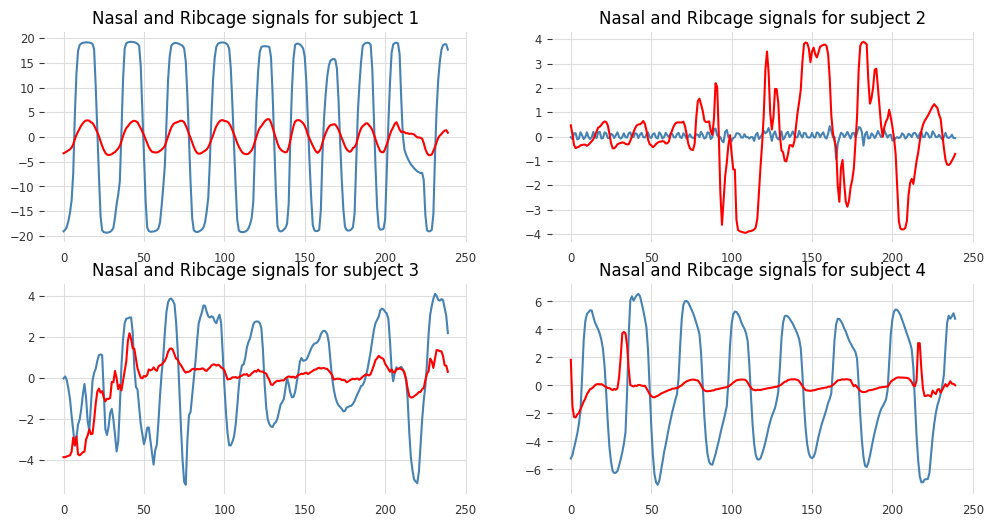

In [27]:
fig, axes = plt.subplots(2,2,figsize=(12, 6))
axes[0,0].plot(X_all[0][0], color='steelblue', linewidth=1.5)
axes[0,0].plot(X_all[0][1], color='red', linewidth=1.5)
axes[0,0].set_title('Nasal and Ribcage signals for subject 1')

axes[0,1].plot(X_all[2000][0], color='steelblue', linewidth=1.5)
axes[0,1].plot(X_all[2000][1], color='red', linewidth=1.5)
axes[0,1].set_title('Nasal and Ribcage signals for subject 2')

axes[1,0].plot(X_all[4000][0], color='steelblue', linewidth=1.5)
axes[1,0].plot(X_all[4000][1], color='red', linewidth=1.5)
axes[1,0].set_title('Nasal and Ribcage signals for subject 3')

axes[1,1].plot(X_all[6000][0], color='steelblue', linewidth=1.5)
axes[1,1].plot(X_all[6000][1], color='red', linewidth=1.5)
axes[1,1].set_title('Nasal and Ribcage signals for subject 4')

## Observation from Plots:

1. We can normalize so the signals are in the same range
2. We can smoothen the signals

## using SG filter

In [28]:
X_all[0][0].shape, X_all[0][1].shape

((240,), (240,))

In [29]:
X_all[0][0]

array([-19.06593407, -18.77289377, -18.22588523, -16.995116  ,
       -15.33455433, -12.81440781,  -7.46153846,   4.2991453 ,
        12.77777778,  17.40781441,  18.63858364,  18.93162393,
        19.08791209,  19.12698413,  19.18559219,  19.16605617,
        19.12698413,  19.02930403,  18.87301587,  17.7985348 ,
        10.27716728,   1.21245421,  -7.81318681, -15.998779  ,
       -18.89010989, -19.22222222, -19.31990232, -19.35897436,
       -19.28083028, -19.16361416, -18.90964591, -18.34310134,
       -16.25274725, -13.5958486 , -11.64224664,  -8.92673993,
         0.97802198,  11.66422466,  17.93528694,  18.99023199,
        19.18559219,  19.26373626,  19.28327228,  19.24420024,
        19.20512821,  19.06837607,  18.89255189,  18.5018315 ,
        14.32112332,   5.15873016,  -4.57020757, -12.67765568,
       -18.28449328, -19.00732601, -19.16361416, -19.14407814,
       -19.10500611, -19.00732601, -18.85103785, -18.46031746,
       -17.26862027, -13.88888889, -10.05982906,  -5.74

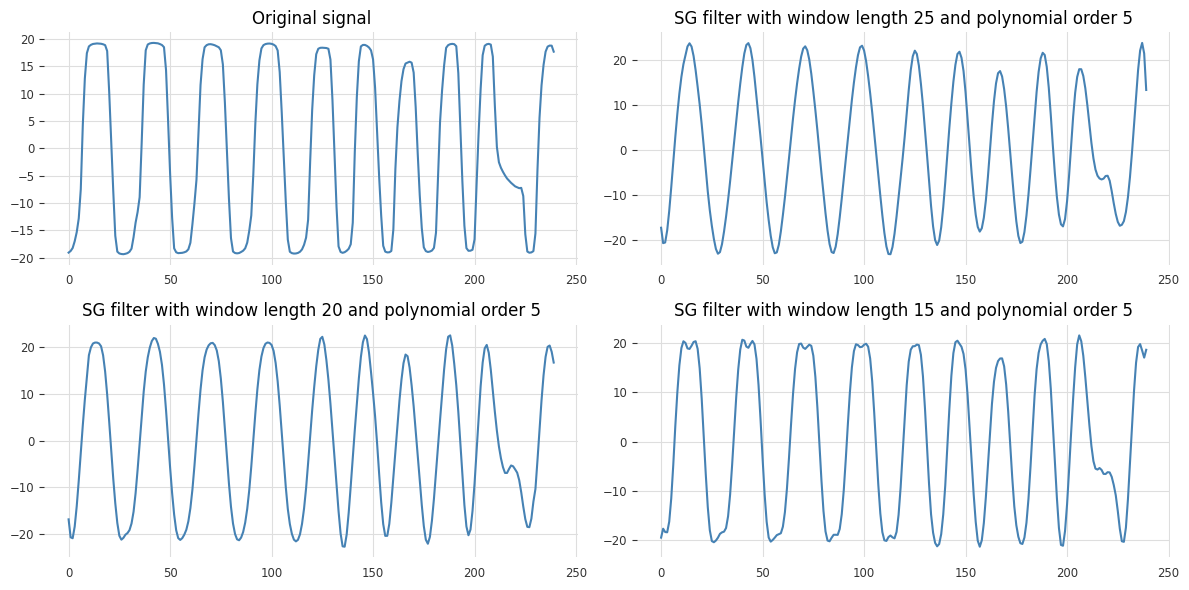

In [30]:
from scipy.signal import savgol_filter

def sg(x, window_length=25, polyorder=4):
    return savgol_filter(x, window_length=window_length, polyorder=polyorder)
fig, axes = plt.subplots(2,2,figsize=(12, 6))
axes[0,0].plot(X_all[0][0], color='steelblue', linewidth=1.5)
axes[0,0].set_title('Original signal')

axes[0,1].plot(sg(X_all[0][0], window_length=25, polyorder=5), color='steelblue', linewidth=1.5)
axes[0,1].set_title('SG filter with window length 25 and polynomial order 5')

axes[1,0].plot(sg(X_all[0][0], window_length=20, polyorder=5), color='steelblue', linewidth=1.5)
axes[1,0].set_title('SG filter with window length 20 and polynomial order 5')

axes[1,1].plot(sg(X_all[0][0], window_length=15, polyorder=5), color='steelblue', linewidth=1.5)
axes[1,1].set_title('SG filter with window length 15 and polynomial order 5')

fig.tight_layout() 

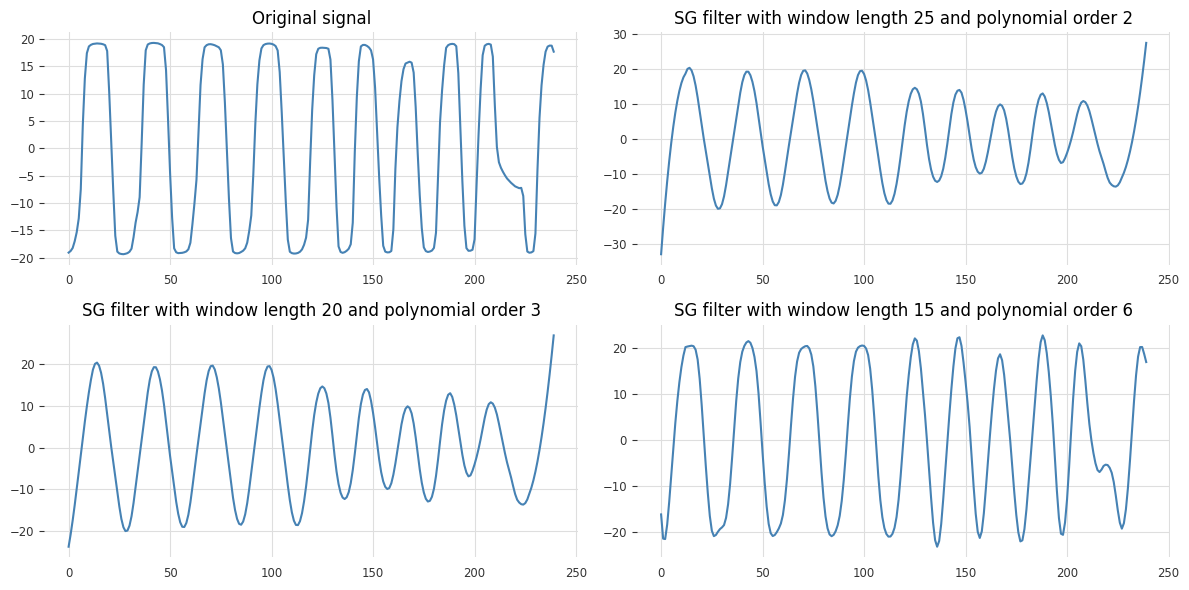

In [31]:
fig, axes = plt.subplots(2,2,figsize=(12, 6))
axes[0,0].plot(X_all[0][0], color='steelblue', linewidth=1.5)
axes[0,0].set_title('Original signal')

axes[0,1].plot(sg(X_all[0][0], window_length=25, polyorder=2), color='steelblue', linewidth=1.5)
axes[0,1].set_title('SG filter with window length 25 and polynomial order 2')

axes[1,0].plot(sg(X_all[0][0], window_length=25, polyorder=3), color='steelblue', linewidth=1.5)
axes[1,0].set_title('SG filter with window length 20 and polynomial order 3')

axes[1,1].plot(sg(X_all[0][0], window_length=25, polyorder=6), color='steelblue', linewidth=1.5)
axes[1,1].set_title('SG filter with window length 15 and polynomial order 6')

fig.tight_layout()

SG filter with window length 25, poly order 5 looks good

## Converting to Pandas dataframe

In [21]:
# df = pd.DataFrame({
#     'nasal': [X_all[i, 0, :] for i in range(X_all.shape[0])],   
#     'ribcage': [X_all[i, 1, :] for i in range(X_all.shape[0])],
#     'sleep stage': y_all.flatten()
# })

In [22]:
# df[:20]

In [23]:
# import pandas as pd
# import numpy as np

# flattened_data = []

# for series_id, row in df.iterrows():
#     nasal_series = row['nasal']
#     ribcage_series = row['ribcage']
#     sleep_stage = row['sleep stage']
    
#     sample_points = np.arange(len(nasal_series))
    
#     for s in sample_points:
#         flattened_data.append({
#             'series_id': series_id,
#             'sample_point': s,
#             'nasal': nasal_series[s],
#             'ribcage': ribcage_series[s],
#             'sleep_stage': sleep_stage
#         })

# flat_df = pd.DataFrame(flattened_data)

# flat_df = flat_df[['series_id', 'sample_point', 'nasal', 'ribcage', 'sleep_stage']]

In [24]:
# flat_df[:10]

In [25]:
# counts = flat_df['sleep_stage'].value_counts()
# counts /= 240
# counts

## Distribution of sleep stages

In [26]:
# counts.plot(kind='bar', figsize=(12, 6), color='steelblue', edgecolor='black')

In [27]:
# flat_df['sleep_stage_binary'] = (flat_df['sleep_stage'] > 0).astype(int)

In [28]:
# counts_binary = flat_df['sleep_stage_binary'].value_counts()
# counts_binary /= 240
# counts_binary

## Distribution of Binary Sleep stages

In [29]:
# counts_binary.plot(kind='bar', figsize=(12, 6), color='steelblue', edgecolor='black')

In [41]:
y_binary = (y_all > 0).astype(int)
np.unique(y_binary, return_counts=True)

(array([0, 1]), array([ 4707, 16082], dtype=int64))

In [42]:
data_binary = []

for i in range(0, X_all.shape[0]):
    data_binary.append([X_all[i], y_binary[i]])

In [43]:
type(data_binary[0][1])

numpy.ndarray

In [ ]:
X_list_loaded = [loaded[f'X_{i}'] for i in range(num_subjects)]
Y_list_loaded = [loaded[f'Y_{i}'] for i in range(num_subjects)]
dataset = [(X_list_loaded[i], Y_list_loaded[i]) for i in range(num_subjects)]
loaded_data = np.load('BetterModels/3stage_sleep_dataset_essential.npz', allow_pickle=True)
run(loaded_data, class_labels=["Awake", "REM", "NREM"])

## Creating Pytorch Dataset

In [44]:
from sklearn.model_selection import train_test_split
train_binary, test_binary = train_test_split(data_binary, test_size=0.2, random_state=42)

In [45]:
train_binary_X = np.array([x[0] for x in train_binary])
train_binary_y = np.array([x[1] for x in train_binary])
train_binary_y

test_binary_X = np.array([x[0] for x in test_binary])
test_binary_y = np.array([x[1] for x in test_binary])

In [47]:
import torch

In [48]:
train_binary_tensorX = torch.tensor([seq for seq, _ in train_binary], dtype=torch.float32)
train_binary_tensorY = torch.tensor([label for _, label in train_binary], dtype=torch.float32)

test_binary_tensorX = torch.tensor([seq for seq, _ in test_binary], dtype=torch.float32)
test_binary_tensorY = torch.tensor([label for _, label in test_binary], dtype=torch.float32)

C:\Users\tanis\AppData\Local\Temp\ipykernel_27776\1709638403.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  train_binary_tensorX = torch.tensor([seq for seq, _ in train_binary], dtype=torch.float32)


In [49]:
train_binary_tensorX.shape, train_binary_tensorY.shape, test_binary_tensorX.shape, test_binary_tensorY.shape

(torch.Size([16631, 2, 240]),
 torch.Size([16631, 1]),
 torch.Size([4158, 2, 240]),
 torch.Size([4158, 1]))

In [50]:

from torch.utils.data import DataLoader
# creat dataset
from torch.utils.data import TensorDataset

test_binary_dataset = TensorDataset(train_binary_tensorX, train_binary_tensorY)
test_binary_dataset = TensorDataset(test_binary_tensorX, test_binary_tensorY)

train_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=False)

In [51]:
for X, y in train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([16, 2, 240]) torch.Size([16, 1])


In [52]:
v = train_binary_tensorY.to('cpu').detach().numpy()
unique, counts = np.unique(v, return_counts=True)
print(dict(zip(unique, counts)))

u = test_binary_tensorY.to('cpu').detach().numpy()
unique, counts = np.unique(u, return_counts=True)

print(dict(zip(unique, counts)))

{0.0: 3744, 1.0: 12887}
{0.0: 963, 1.0: 3195}


In [63]:
# import torch
# import numpy as np
# from scipy.signal import savgol_filter
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split


# X_data = np.vstack((train_binary_X, test_binary_X))
# Y_data = np.vstack((train_binary_y, test_binary_y))



# def normalize_channels(data):
#     means = np.mean(data, axis=(0, 2))
#     stds = np.std(data, axis=(0, 2))    
#     norm_data =  (data - means[:, None]) / stds[:, None]
#     return norm_data

# X_norm = normalize_channels(X_data)


# def apply_sg_filter(data, window=25, order=5):
#     filtered = np.zeros_like(data)
#     for i in range(data.shape[0]):
#         for j in range(data.shape[1]):
#             filtered[i, j] = savgol_filter(data[i, j], window, order)
#     return filtered

# X_sg = apply_sg_filter(X_data)  
# X_sg_norm = normalize_channels(X_sg) 
# X_norm_sg = apply_sg_filter(X_norm)


# fig, ax = plt.subplots(1, 5, figsize=(12, 6))

# ax[0].plot(X_data[0, 0], color='steelblue', linewidth=1.5)
# ax[0].plot(X_data[0, 1], color='darkorange', linewidth=1.5)
# ax[0].set_title('Original signal')

# ax[1].plot(X_sg[0, 0], color='steelblue', linewidth=1.5)
# ax[1].plot(X_sg[0, 1], color='darkorange', linewidth=1.5)
# ax[1].set_title('SG filtered signal')


# ax[2].plot(X_norm[0, 0], color='steelblue', linewidth=1.5)
# ax[2].plot(X_norm[0, 1], color='darkorange', linewidth=1.5)
# ax[2].set_title("normalized signal")

# ax[3].plot(X_sg_norm[0, 0], color='steelblue', linewidth=1.5)
# ax[3].plot(X_sg_norm[0, 1], color='darkorange', linewidth=1.5)
# ax[3].set_title('SG then norm signal')


# ax[4].plot(X_norm_sg[0, 0], color='steelblue', linewidth=1.5)
# ax[4].plot(X_norm_sg[0, 1], color='darkorange', linewidth=1.5)
# ax[4].set_title('norm then SG signal')

# ax[0].grid(True, linestyle='--', alpha=0.7)
# ax[1].grid(True, linestyle='--', alpha=0.7)
# ax[2].grid(True, linestyle='--', alpha=0.7)
# ax[3].grid(True, linestyle='--', alpha=0.7)
# ax[4].grid(True, linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

# X_train, X_test, y_train, y_test = train_test_split(X_sg_norm, Y_data, test_size=0.2, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# X_train_flat = X_train.reshape(X_train.shape[0], -1) 

# sm = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train_flat, y_train)

# def restore_shape(data, original_shape):
#     return data.reshape(-1, original_shape[1], original_shape[2])

# X_train_balanced = restore_shape(X_train_res, X_train.shape) 

# processed_X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32)
# processed_y_train_tensor = torch.tensor(y_train_res, dtype=torch.float32).unsqueeze(1)
# processed_X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# processed_y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)



# # # Verify results
# # print("Original class counts:", np.bincount(y_train))
# # print("Balanced class counts:", np.bincount(y_train_res))
# # print("Normalized channel means (train):", X_train_tensor.mean(dim=(0, 2)))
# # print("Normalized channel stds (train):", X_train_tensor.std(dim=(0, 2)))

In [ ]:
v = processed_y_train_tensor.to('cpu').detach().numpy()
unique, counts = np.unique(v, return_counts=True)
print(dict(zip(unique, counts)))

u = processed_y_test_tensor.to('cpu').detach().numpy()
unique, counts = np.unique(u, return_counts=True)

print(dict(zip(unique, counts)))

{0.0: 12849, 1.0: 12849}
{0.0: 925, 1.0: 3233}


In [ ]:

from torch.utils.data import DataLoader
# creat dataset
from torch.utils.data import TensorDataset

processed_test_binary_dataset = TensorDataset(processed_X_train_tensor, processed_y_train_tensor)
processed_test_binary_dataset = TensorDataset(processed_X_test_tensor, processed_y_test_tensor)

processed_train_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=True)
processed_test_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=False)

In [ ]:
for X, y in processed_train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([16, 2, 240]) torch.Size([16, 1])


## MODEL

In [65]:
import torch.nn.functional as F
import torch.nn as nn


%matplotlib inline

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [67]:
class SleepLSTM(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, num_layers=1):
        super(SleepLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1) 

    def forward(self, x):
        x = x.permute(0, 2, 1) 
        lstm_out, _ = self.lstm(x) 
        last_timestep = lstm_out[:, -1, :] 
        output = self.fc(last_timestep)  
        return output  

In [73]:
class SleepCNNLSTM(nn.Module):
    def __init__(self, n_features=2, n_classes=2, conv_channels=64, lstm_hidden=128, lstm_layers=3):
        super().__init__()
        
        self.conv = nn.Sequential(
            nn.Conv1d(n_features, conv_channels, kernel_size=5, padding=2),
            nn.BatchNorm1d(conv_channels),
            nn.ReLU(),
            nn.MaxPool1d(2),
            
            nn.Conv1d(conv_channels, conv_channels*2, kernel_size=3, padding=1),
            nn.BatchNorm1d(conv_channels*2),
            nn.ReLU(),
            nn.Dropout(0.3),
        )
        
        self.bilstm = nn.LSTM(
            input_size=conv_channels*2, 
            hidden_size=lstm_hidden,
            num_layers=lstm_layers,
            bidirectional=True,
            batch_first=True,
            dropout=0.2 if lstm_layers > 1 else 0
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(lstm_hidden*2*2, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        
        x = self.conv(x) 
        
        x = x.permute(0, 2, 1) 
        
        bilstm_out, (h_n, c_n) = self.bilstm(x)  
        

        last_timestep_output = bilstm_out[:, -1, :] 
        

        last_layer_forward = h_n[-2, :, :] 
        last_layer_backward = h_n[-1, :, :]  
        last_layer_combined = torch.cat([last_layer_forward, last_layer_backward], dim=1)
        
        combined_features = torch.cat(
            [last_timestep_output, last_layer_combined], 
            dim=1
        )  
        
        output = self.classifier(combined_features)
        return output

In [74]:
def train_loop(model, num_epochs, criterion, optimizer, train_loader, device):
    train_results = []
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            labels = labels.reshape(-1, 1)

            optimizer.zero_grad()
            outputs = model(inputs)  
            loss = criterion(outputs, labels)

            train_results.append((labels, (outputs)))

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}", end='\r')

    avg_loss = total_loss / len(train_loader)
    print(f"Training Loss: {avg_loss:.4f}")
    return train_results

def test_loop(model, criterion, test_loader, device):
    
    test_results = []

    model.eval()
    correct = 0
    total = 0
    total_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.reshape(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

            preds = torch.sigmoid(outputs)  
            predicted_labels = (preds > 0.5).float()  
            test_results.append((labels, preds))

            correct += (predicted_labels == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    avg_loss = total_loss / len(test_loader)
    print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {avg_loss:.4f}")
    return test_results

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_curve, f1_score, 
    precision_score, recall_score, roc_auc_score
)
from scipy.special import softmax

def load_metrics(test_results, i):
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]

    y_prob_tensor = torch.cat([torch.tensor(prob, dtype=torch.float32) for prob in y_prob])
    # print(x > 0.5)
    y_pred = (torch.cat(y_prob_tensor).cpu().detach() > 0.5).float()
    y_true = torch.cat(y_true).cpu().detach().numpy()
    y_prob = torch.cat(y_prob_tensor).cpu().detach().numpy()
    cm = confusion_matrix(y_true, y_pred)

    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]

    print("tn", tn)
    print("fp", fp)
    print("fn", fn)
    print("tp", tp)
    print("cm", cm)

    if i in [0, 1, 15, 24]:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)  
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")


    if i in [0, 1, 15, 24]:
        precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_prob)

        plt.figure(figsize=(6, 6))
        plt.plot(recall_vals, precision_vals, marker='.', label='PR Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.grid()
        plt.show()


    correct_predictions = (y_true == y_pred).sum()
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions

    return accuracy, precision, recall, specificity, f1, auc, y_true, y_prob

In [76]:
def plotter(test_results):
    y_true = [i[0].cpu().numpy() for i in test_results]
    y_pred = [(i[1] > 0.5).cpu().numpy() for i in test_results]


    fig, ax = plt.subplots(2,2, figsize=(12, 6))

    ax[0,0].plot(y_true[0] , color='steelblue', linewidth=1.5, label='Truth')
    ax[0,0].plot(y_pred[0], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[0, 0].set_xlabel('Batch No', fontsize=12)
    ax[0, 0].set_ylabel('Sleep Stage', fontsize=12)
    ax[0,0].legend()

    ax[0,1].plot(y_true[1], color='steelblue', linewidth=1.5, label='Truth')
    ax[0,1].plot(y_pred[1], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[0, 1].set_xlabel('Batch No', fontsize=12)
    ax[0, 1].set_ylabel('Sleep Stage', fontsize=12)
    ax[0,1].legend()

    ax[1,0].plot(y_true[2], color='steelblue', linewidth=1.5, label='Truth')
    ax[1,0].plot(y_pred[2], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[1, 0].set_xlabel('Batch No', fontsize=12)
    ax[1, 0].set_ylabel('Sleep Stage', fontsize=12)
    ax[1,0].legend()

    ax[1,1].plot(y_true[15], color='steelblue', linewidth=1.5, label='Truth')
    ax[1,1].plot(y_pred[15], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[1, 1].set_xlabel('Batch No', fontsize=12)
    ax[1, 1].set_ylabel('Sleep Stage', fontsize=12)
    ax[1,1].legend()

    fig.tight_layout()
    plt.show()


## HYPER PARAMETERS

In [77]:
input_size = 2
hidden_size = 64
num_layers = 1
batch_size = 16
num_epochs = 10
learning_rate = 0.0005

## Using Unprocessed Data on LSTM model

In [107]:
# # subjects = list(set(dataset.subject_ids))  # Assuming `dataset.subject_ids` gives subject labels
# results = []

# model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
# criterion = nn.BCEWithLogitsLoss() 
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# for i, data in enumerate(binary_subject_wise_data):
#     print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
#         # Split data: leave out the current subject for testing
#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     print(train_features.shape, train_labels.shape)

#     # Create a dataset and DataLoader
#     train_dataset = list(zip(torch.tensor(train_features, dtype=torch.float32),
#                              torch.tensor(train_labels, dtype=torch.float32)))
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     test_dataset = list(zip(torch.tensor(test_data[0], dtype=torch.float32),
#                             torch.tensor(test_data[1], dtype=torch.float32)))
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # for x,y in train_loader:
#     #     print(x.shape, y.shape)
#     #     break
    
#     # Reinitialize the model for each fold
#     model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Train the model
#     # for t in range(num_epochs):
#         # print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs, train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, device=device)

#     # Evaluate on the test subject
#     test_results = test_loop(test_loader=test_loader, model=model, criterion=criterion, device=device)
#     results.append((i, test_results))
    
#     # Process metrics and plot results for each fold
#     y_true = [i[0] for i in test_results]
#     y_prob = [i[1] for i in test_results]
#     load_metrics(test_results)
#     plotter(test_results)

# print("Cross-validation complete!")


## Using Unprocessed Data on LSTM model

In [30]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# def normalize_channels(data):
#     means = np.mean(data, axis=(0, 2))
#     stds = np.std(data, axis=(0, 2))
#     norm_data = (data - means[:, None]) / stds[:, None]
#     return norm_data

# def apply_sg_filter(data, window=25, order=5):
#     filtered = np.zeros_like(data)
#     for i in range(data.shape[0]):
#         for j in range(data.shape[1]):
#             filtered[i, j] = savgol_filter(data[i, j], window, order)
#     return filtered

# def restore_shape(data, original_shape):
#     return data.reshape(-1, original_shape[1], original_shape[2])

# fold_results = []
# fold = []
# criterion = nn.BCEWithLogitsLoss() 
# results = []
# # Cross-validation loop
# for i, data in enumerate(binary_subject_wise_data):
#     print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
#     # Split data: leave out the current subject for testing
#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels for training
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     test_features = test_data[0]
#     test_labels = test_data[1]


#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     print(train_features.shape, train_labels.shape)

#     # Create a dataset and DataLoader
#     train_dataset = list(zip(torch.tensor(train_features, dtype=torch.float32),
#                              torch.tensor(train_labels, dtype=torch.float32)))
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     test_dataset = list(zip(torch.tensor(test_data[0], dtype=torch.float32),
#                             torch.tensor(test_data[1], dtype=torch.float32)))
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#     # Reinitialize the model for each fold
#     model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Train the model
#     # for t in range(num_epochs):
#     #     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs, train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, device=device)

#     # Evaluate on the test subject
#     test_results = test_loop(test_loader=test_loader, model=model, criterion=criterion, device=device)
#     results.append((i, test_results))

#     # Process metrics and plot results for each fold
#     y_true = [i[0] for i in test_results]
#     y_prob = [i[1] for i in test_results]


#     accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
#     # Compute metrics for this fold
#     fold_metrics = {
#         "accuracy": accuracy_score,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "roc_auc": auc,
#         "specificity": specificity,
#     }

#     fold_results.append(fold_metrics)

#     fold_pred = {
#         "y_true": y_true,
#         "y_pred": (y_prob > 0.5).astype(int)
#     }
#     fold.append(fold_pred)

#     print(f"Fold {i+1} metrics: {fold_metrics}")
    
#     if i in [0, 1, 15, 24]:
#         plotter(test_results)
#     # load_metrics(test_results)

# print("Cross-validation complete!")

# final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
#                          "std": np.std([fold[metric] for fold in fold_results])}
#                  for metric in fold_results[0]}

# print("\nFinal Metrics:")
# for metric, values in final_metrics.items():
#     print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# # Plot accuracy for each fold
# accuracies = [fold["accuracy"] for fold in fold_results]
# plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
# plt.xlabel("Fold (Subject)")
# plt.ylabel("Accuracy")
# plt.title("Leave-One-Subject-Out Accuracy")
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Optional: Confusion Matrix (combine all folds)
# y_true_all = np.concatenate([fold["y_true"] for fold in fold])
# y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
# cm = confusion_matrix(y_true_all, y_pred_all)
# ConfusionMatrixDisplay(cm).plot()
# plt.show()


In [95]:
# model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
# criterion = nn.BCEWithLogitsLoss() 
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# epochs = num_epochs
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs,train_loader=train_dataloader, model=model, criterion=criterion, optimizer=optimizer, device=device)
#     test_results = test_loop(test_loader=test_dataloader, model=model, criterion=criterion, device=device)

# y_true = [i[0] for i in test_results]
# y_prob = [i[1] for i in test_results]
# x = torch.cat(y_prob).cpu().detach().numpy()
# load_metrics(test_results)
# plotter(test_results)
# print("Done!")

## Using Proccessed Data (SG filter, normalization, SMOTE) on LSTM model

In [31]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# def normalize_channels(data):
#     means = np.mean(data, axis=(0, 2))
#     stds = np.std(data, axis=(0, 2))
#     norm_data = (data - means[:, None]) / stds[:, None]
#     return norm_data

# def apply_sg_filter(data, window=25, order=5):
#     filtered = np.zeros_like(data)
#     for i in range(data.shape[0]):
#         for j in range(data.shape[1]):
#             filtered[i, j] = savgol_filter(data[i, j], window, order)
#     return filtered

# def restore_shape(data, original_shape):
#     return data.reshape(-1, original_shape[1], original_shape[2])

# fold_results = []
# fold = []
# criterion = nn.BCEWithLogitsLoss() 
# results = []
# # Cross-validation loop
# for i, data in enumerate(binary_subject_wise_data):
#     print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
#     # Split data: leave out the current subject for testing
#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels for training
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     test_features = test_data[0]
#     test_labels = test_data[1]

#     # Preprocess the data
#     train_norm = normalize_channels(train_features)
#     train_sg = apply_sg_filter(train_norm)
#     test_norm = normalize_channels(test_features)
#     test_sg = apply_sg_filter(test_norm)

#     # Balance training data using SMOTE
#     train_flat = train_sg.reshape(train_sg.shape[0], -1)  # Flatten for SMOTE
#     sm = SMOTE(sampling_strategy='auto', random_state=42)
#     train_resampled, labels_resampled = sm.fit_resample(train_flat, train_labels)

#     # Restore shape after SMOTE
#     train_resampled = restore_shape(train_resampled, train_sg.shape)

#     # Convert to PyTorch tensors
#     processed_X_train_tensor = torch.tensor(train_resampled, dtype=torch.float32)
#     processed_y_train_tensor = torch.tensor(labels_resampled, dtype=torch.float32).unsqueeze(1)
#     processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
#     processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

#     # Create DataLoaders
#     train_dataset = list(zip(processed_X_train_tensor, processed_y_train_tensor))
#     test_dataset = list(zip(processed_X_test_tensor, processed_y_test_tensor))
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # Reinitialize the model for each fold
#     model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Train the model
#     # for t in range(num_epochs):
#     #     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs, train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, device=device)

#     # Evaluate on the test subject
#     test_results = test_loop(test_loader=test_loader, model=model, criterion=criterion, device=device)
#     results.append((i, test_results))

#     # Process metrics and plot results for each fold
#     y_true = [i[0] for i in test_results]
#     y_prob = [i[1] for i in test_results]


#     accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
#     # Compute metrics for this fold
#     fold_metrics = {
#         "accuracy": accuracy_score,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "roc_auc": auc,
#         "specificity": specificity,
#     }

#     fold_results.append(fold_metrics)

#     fold_pred = {
#         "y_true": y_true,
#         "y_pred": (y_prob > 0.5).astype(int)
#     }
#     fold.append(fold_pred)

#     print(f"Fold {i+1} metrics: {fold_metrics}")
    
#     if i in [0, 1, 15, 24]:
#     # load_metrics(test_results)
#         plotter(test_results)

# print("Cross-validation complete!")

# final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
#                          "std": np.std([fold[metric] for fold in fold_results])}
#                  for metric in fold_results[0]}

# print("\nFinal Metrics:")
# for metric, values in final_metrics.items():
#     print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# # Plot accuracy for each fold
# accuracies = [fold["accuracy"] for fold in fold_results]
# plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
# plt.xlabel("Fold (Subject)")
# plt.ylabel("Accuracy")
# plt.title("Leave-One-Subject-Out Accuracy")
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Optional: Confusion Matrix (combine all folds)
# y_true_all = np.concatenate([fold["y_true"] for fold in fold])
# y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
# cm = confusion_matrix(y_true_all, y_pred_all)
# ConfusionMatrixDisplay(cm).plot()
# plt.show()


In [110]:
# model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
# criterion = nn.BCEWithLogitsLoss() 
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# epochs = num_epochs
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs,train_loader=processed_train_dataloader, model=model, criterion=criterion, optimizer=optimizer, device=device)
#     test_results = test_loop(test_loader=processed_test_dataloader, model=model, criterion=criterion, device=device)

# y_true = [i[0] for i in test_results]
# y_prob = [i[1] for i in test_results]
# x = torch.cat(y_prob).cpu().detach().numpy()
# load_metrics(test_results)
# plotter(test_results)
# print("Done!")

## Using Unprocessed Data on CNN -> BiLSTM model

In [111]:
# modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
# criterioncnnlstm = nn.BCEWithLogitsLoss()
# optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)

# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs,train_loader=train_dataloader, model=modelcnnlstm, criterion=criterioncnnlstm, optimizer=optimizercnnlstm, device=device)
#     test_results = test_loop(test_loader=test_dataloader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)

# y_true = [i[0] for i in test_results]
# y_prob = [i[1] for i in test_results]
# x = torch.cat(y_prob).cpu().detach().numpy()
# load_metrics(test_results)
# plotter(test_results)
# print("Done!")

In [ ]:
# fold_results = []
# fold = []
# results = []

# criterioncnnlstm = nn.BCEWithLogitsLoss()
# # Cross-validation loop
# for i, data in enumerate(binary_subject_wise_data):
#     print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
#     # Split data: leave out the current subject for testing
#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels for training
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     test_features = test_data[0]
#     test_labels = test_data[1]


#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     print(train_features.shape, train_labels.shape)

#     # Create a dataset and DataLoader
#     train_dataset = list(zip(torch.tensor(train_features, dtype=torch.float32),
#                              torch.tensor(train_labels, dtype=torch.float32)))
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     test_dataset = list(zip(torch.tensor(test_data[0], dtype=torch.float32),
#                             torch.tensor(test_data[1], dtype=torch.float32)))
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


#     # Reinitialize the model for each fold
#     modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
#     optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)

#     # Train the model
#     # for t in range(num_epochs):
#     #     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs, train_loader=train_loader, model=modelcnnlstm, criterion=criterion, optimizer=optimizercnnlstm, device=device)

#     # Evaluate on the test subject
#     test_results = test_loop(test_loader=test_loader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)
#     results.append((i, test_results))

#     # Process metrics and plot results for each fold
#     y_true = [i[0] for i in test_results]
#     y_prob = [i[1] for i in test_results]


#     accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
#     # Compute metrics for this fold
#     fold_metrics = {
#         "accuracy": accuracy_score,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "roc_auc": auc,
#         "specificity": specificity,
#     }

#     fold_results.append(fold_metrics)

#     fold_pred = {
#         "y_true": y_true,
#         "y_pred": (y_prob > 0.5).astype(int)
#     }
#     fold.append(fold_pred)

#     print(f"Fold {i+1} metrics: {fold_metrics}")
    
#     if i in [0, 1, 15, 24]:
        plotter(test_results)
#     # load_metrics(test_results)

# print("Cross-validation complete!")

# final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
#                          "std": np.std([fold[metric] for fold in fold_results])}
#                  for metric in fold_results[0]}

# print("\nFinal Metrics:")
# for metric, values in final_metrics.items():
#     print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# # Plot accuracy for each fold
# accuracies = [fold["accuracy"] for fold in fold_results]
# plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
# plt.xlabel("Fold (Subject)")
# plt.ylabel("Accuracy")
# plt.title("Leave-One-Subject-Out Accuracy")
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Optional: Confusion Matrix (combine all folds)
# y_true_all = np.concatenate([fold["y_true"] for fold in fold])
# y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
# cm = confusion_matrix(y_true_all, y_pred_all)
# ConfusionMatrixDisplay(cm).plot()
# plt.show()


## Using Proccessed Data (SG filter, normalization, SMOTE) on CNN -> LSTM model

In [34]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# def normalize_channels(data):
#     means = np.mean(data, axis=(0, 2))
#     stds = np.std(data, axis=(0, 2))
#     norm_data = (data - means[:, None]) / stds[:, None]
#     return norm_data

# def apply_sg_filter(data, window=25, order=5):
#     filtered = np.zeros_like(data)
#     for i in range(data.shape[0]):
#         for j in range(data.shape[1]):
#             filtered[i, j] = savgol_filter(data[i, j], window, order)
#     return filtered

# def restore_shape(data, original_shape):
#     return data.reshape(-1, original_shape[1], original_shape[2])

# fold_results = []
# fold = []
# criterioncnnlstm = nn.BCEWithLogitsLoss()
# results = []
# # Cross-validation loop
# for i, data in enumerate(binary_subject_wise_data):
#     print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
#     # Split data: leave out the current subject for testing
#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels for training
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     test_features = test_data[0]
#     test_labels = test_data[1]

#     # Preprocess the data
#     train_norm = normalize_channels(train_features)
#     train_sg = apply_sg_filter(train_norm)
#     test_norm = normalize_channels(test_features)
#     test_sg = apply_sg_filter(test_norm)

#     # Balance training data using SMOTE
#     train_flat = train_sg.reshape(train_sg.shape[0], -1)  # Flatten for SMOTE
#     sm = SMOTE(sampling_strategy='auto', random_state=42)
#     train_resampled, labels_resampled = sm.fit_resample(train_flat, train_labels)

#     # Restore shape after SMOTE
#     train_resampled = restore_shape(train_resampled, train_sg.shape)

#     # Convert to PyTorch tensors
#     processed_X_train_tensor = torch.tensor(train_resampled, dtype=torch.float32)
#     processed_y_train_tensor = torch.tensor(labels_resampled, dtype=torch.float32).unsqueeze(1)
#     processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
#     processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

#     # Create DataLoaders
#     train_dataset = list(zip(processed_X_train_tensor, processed_y_train_tensor))
#     test_dataset = list(zip(processed_X_test_tensor, processed_y_test_tensor))
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # Reinitialize the model for each fold
#     modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
#     optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)


#     # Train the model
#     # for t in range(num_epochs):
#     #     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs, train_loader=train_loader, model=modelcnnlstm, criterion=criterioncnnlstm, optimizer=optimizercnnlstm, device=device)

#     # Evaluate on the test subject
#     test_results = test_loop(test_loader=test_loader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)
#     results.append((i, test_results))

#     # Process metrics and plot results for each fold
#     y_true = [i[0] for i in test_results]
#     y_prob = [i[1] for i in test_results]


#     accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
#     # Compute metrics for this fold
#     fold_metrics = {
#         "accuracy": accuracy_score,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "roc_auc": auc,
#         "specificity": specificity,
#     }

#     fold_results.append(fold_metrics)

#     fold_pred = {
#         "y_true": y_true,
#         "y_pred": (y_prob > 0.5).astype(int)
#     }
#     fold.append(fold_pred)

#     print(f"Fold {i+1} metrics: {fold_metrics}")
    
#     if i in [0, 1, 15, 24]:
#     # load_metrics(test_results)
#         plotter(test_results)

# print("Cross-validation complete!")

# final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
#                          "std": np.std([fold[metric] for fold in fold_results])}
#                  for metric in fold_results[0]}

# print("\nFinal Metrics:")
# for metric, values in final_metrics.items():
#     print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# # Plot accuracy for each fold
# accuracies = [fold["accuracy"] for fold in fold_results]
# plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
# plt.xlabel("Fold (Subject)")
# plt.ylabel("Accuracy")
# plt.title("Leave-One-Subject-Out Accuracy")
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Optional: Confusion Matrix (combine all folds)
# y_true_all = np.concatenate([fold["y_true"] for fold in fold])
# y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
# cm = confusion_matrix(y_true_all, y_pred_all)
# ConfusionMatrixDisplay(cm).plot()
# plt.show()


CNN + BiLSTM with normalization and SG filter

In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def normalize_channels(data):
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

fold_results = []
fold = []
criterioncnnlstm = nn.BCEWithLogitsLoss()
results = []
# Cross-validation loop
for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: leave out the current subject for testing
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels for training
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    # Preprocess the data
    train_norm = normalize_channels(train_features)
    train_sg = apply_sg_filter(train_norm)
    test_norm = normalize_channels(test_features)
    test_sg = apply_sg_filter(test_norm)


    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_sg, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    # Create DataLoaders
    train_dataset = list(zip(processed_X_train_tensor, processed_y_train_tensor))
    test_dataset = list(zip(processed_X_test_tensor, processed_y_test_tensor))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for each fold
    modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
    optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)


    # Train the model
    # for t in range(num_epochs):
    #     print(f"Epoch {t+1}\n-------------------------------")
    train_loop(num_epochs=num_epochs, train_loader=train_loader, model=modelcnnlstm, criterion=criterioncnnlstm, optimizer=optimizercnnlstm, device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]


    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
    # load_metrics(test_results)
        plotter(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Confusion Matrix (combine all folds)
y_true_all = np.concatenate([fold["y_true"] for fold in fold])
y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


NameError: name 'nn' is not defined

Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
Training Loss: 0.30924266
Test Accuracy: 0.8767, Test Loss: 0.2634
tn 44
fp 75
fn 17
tp 610
cm [[ 44  75]
 [ 17 610]]


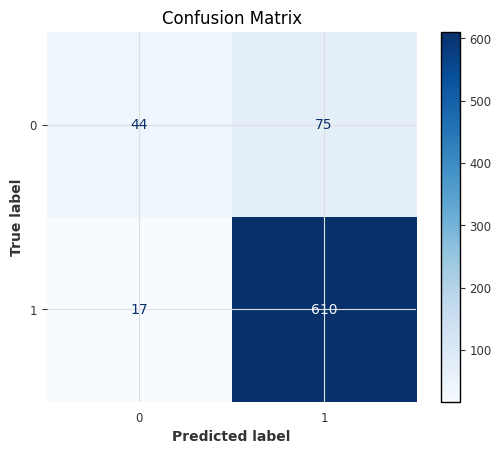

Precision: 0.8905
Recall (Sensitivity): 0.9729
Specificity: 0.3697
F1-Score: 0.9299
AUC-ROC: 0.6713


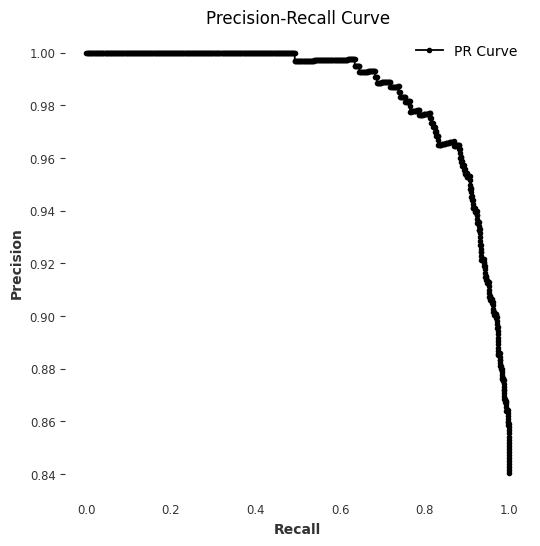

Fold 1 metrics: {'accuracy': tensor(0.8767), 'precision': 0.8905109489051095, 'recall': 0.9728867623604466, 'f1': 0.9298780487804879, 'roc_auc': 0.6713173307600553, 'specificity': 0.3697478991596639}


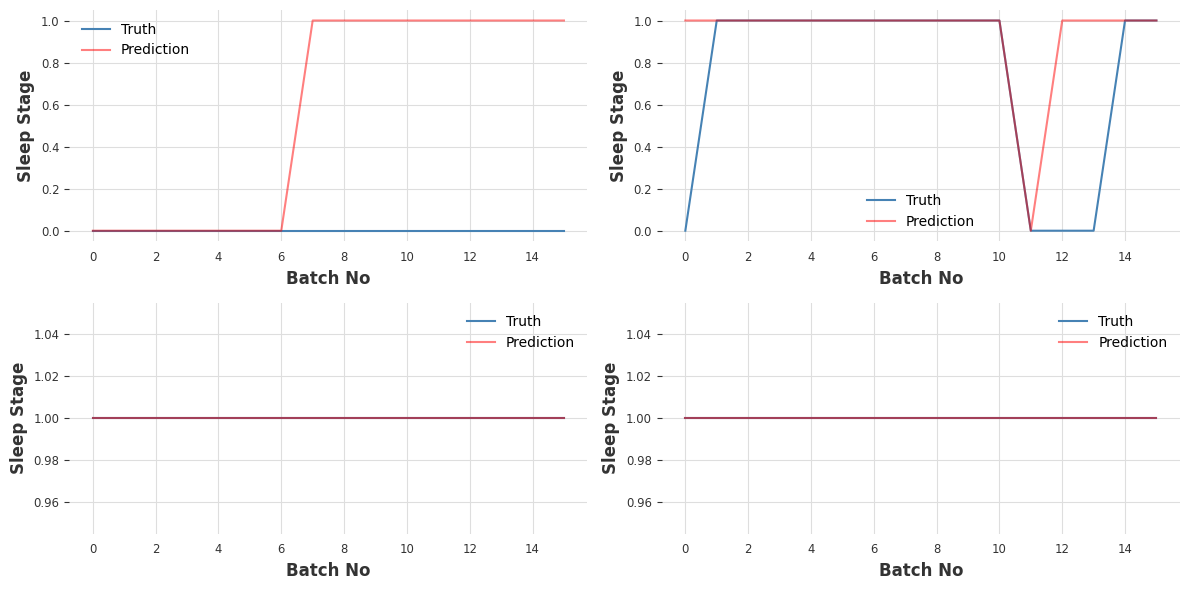

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
Training Loss: 0.30642889
Test Accuracy: 0.9466, Test Loss: 0.1520
tn 141
fp 25
fn 22
tp 692
cm [[141  25]
 [ 22 692]]


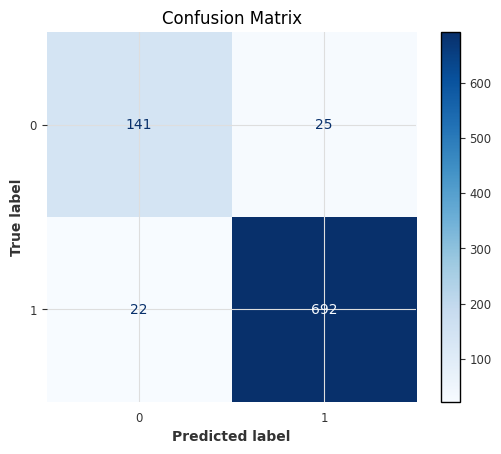

Precision: 0.9651
Recall (Sensitivity): 0.9692
Specificity: 0.8494
F1-Score: 0.9672
AUC-ROC: 0.9093


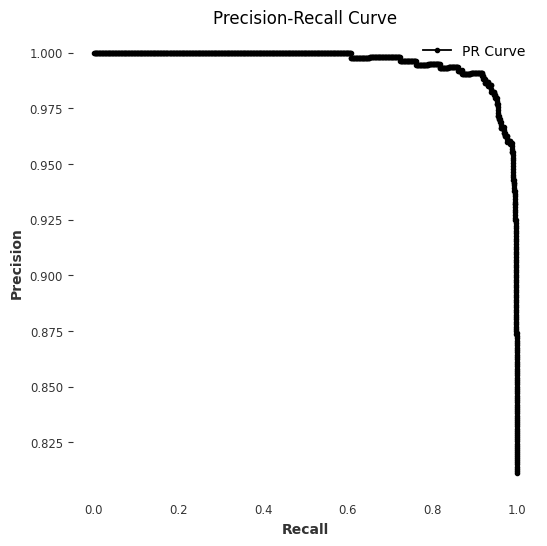

Fold 2 metrics: {'accuracy': tensor(0.9466), 'precision': 0.9651324965132496, 'recall': 0.969187675070028, 'f1': 0.9671558350803634, 'roc_auc': 0.9092926327157369, 'specificity': 0.8493975903614458}


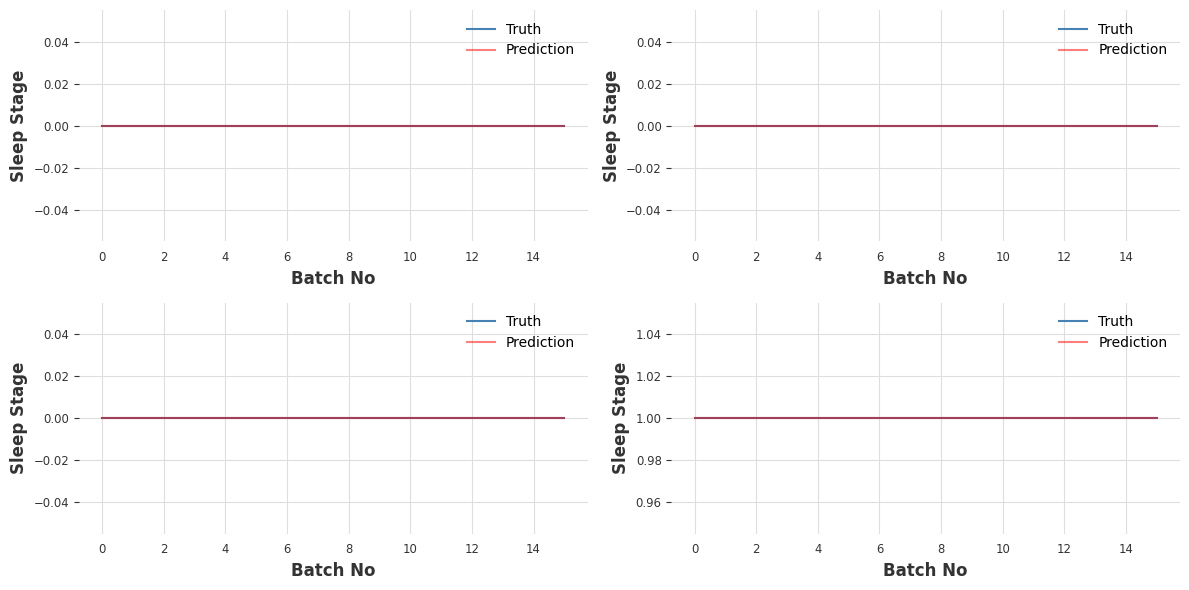

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
Training Loss: 0.30942409
Test Accuracy: 0.7002, Test Loss: 0.7944
tn 70
fp 237
fn 10
tp 507
cm [[ 70 237]
 [ 10 507]]
Precision: 0.6815
Recall (Sensitivity): 0.9807
Specificity: 0.2280
F1-Score: 0.8041
AUC-ROC: 0.6043
Fold 3 metrics: {'accuracy': tensor(0.7002), 'precision': 0.6814516129032258, 'recall': 0.9806576402321083, 'f1': 0.8041237113402062, 'roc_auc': 0.6043353347740347, 'specificity': 0.2280130293159609}
Leave-One-Subject-Out CV - Subject: 4
-----------------------------------
Training Loss: 0.31491223
Test Accuracy: 0.9355, Test Loss: 0.1818
tn 67
fp 23
fn 29
tp 687
cm [[ 67  23]
 [ 29 687]]
Precision: 0.9676
Recall (Sensitivity): 0.9595
Specificity: 0.7444
F1-Score: 0.9635
AUC-ROC: 0.8520
Fold 4 metrics: {'accuracy': tensor(0.9355), 'precision': 0.967605633802817, 'recall': 0.9594972067039106, 'f1': 0.9635343618513323, 'roc_auc': 0.8519708255741776, 'specificity': 0.7444444444444445}
Leave-One-Subjec

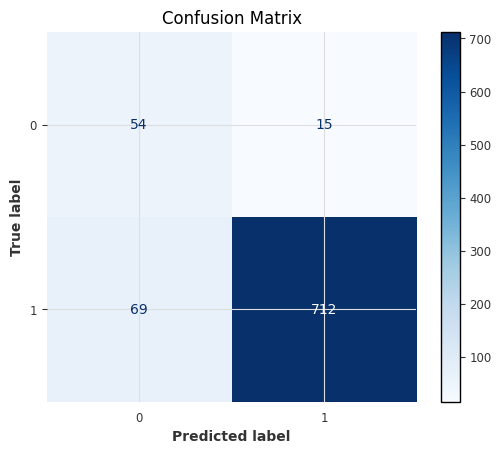

Precision: 0.9794
Recall (Sensitivity): 0.9117
Specificity: 0.7826
F1-Score: 0.9443
AUC-ROC: 0.8471


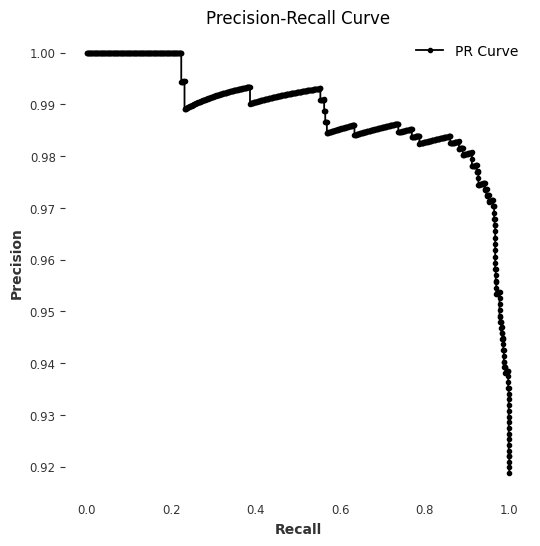

Fold 16 metrics: {'accuracy': tensor(0.9012), 'precision': 0.9793672627235214, 'recall': 0.911651728553137, 'f1': 0.9442970822281167, 'roc_auc': 0.8471302121026555, 'specificity': 0.782608695652174}


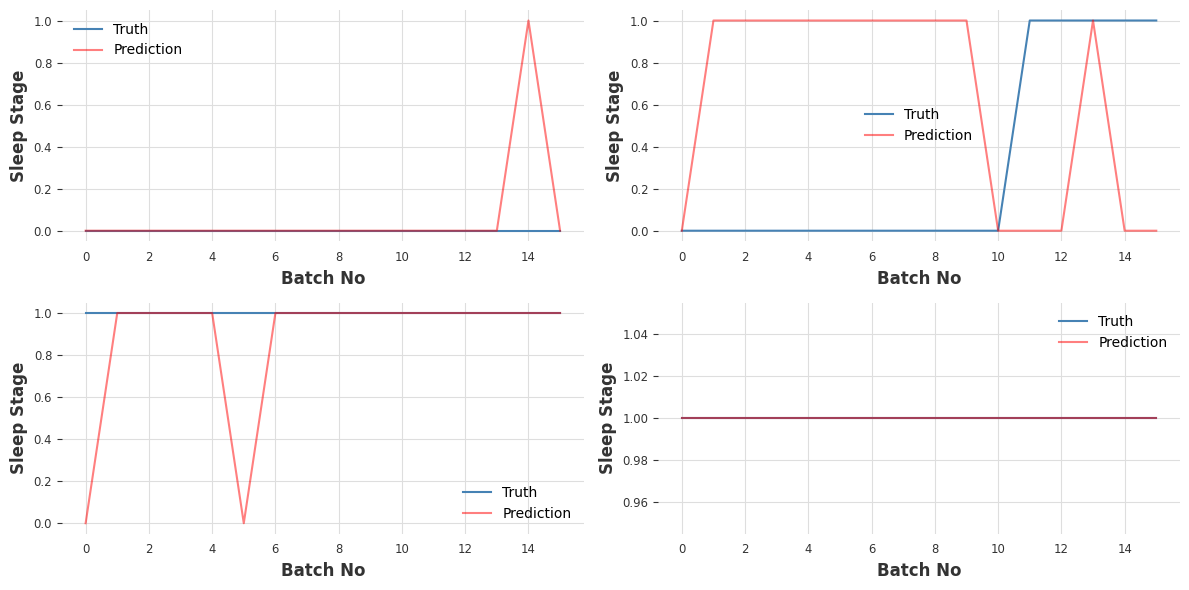

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
Training Loss: 0.31340256
Test Accuracy: 0.7427, Test Loss: 0.4806
tn 109
fp 58
fn 135
tp 448
cm [[109  58]
 [135 448]]
Precision: 0.8854
Recall (Sensitivity): 0.7684
Specificity: 0.6527
F1-Score: 0.8228
AUC-ROC: 0.7106
Fold 17 metrics: {'accuracy': tensor(0.7427), 'precision': 0.8853754940711462, 'recall': 0.7684391080617495, 'f1': 0.82277318640955, 'roc_auc': 0.7105668594200963, 'specificity': 0.6526946107784432}
Leave-One-Subject-Out CV - Subject: 18
-----------------------------------
Training Loss: 0.30510182
Test Accuracy: 0.8244, Test Loss: 0.3554
tn 117
fp 47
fn 113
tp 634
cm [[117  47]
 [113 634]]
Precision: 0.9310
Recall (Sensitivity): 0.8487
Specificity: 0.7134
F1-Score: 0.8880
AUC-ROC: 0.7811
Fold 18 metrics: {'accuracy': tensor(0.8244), 'precision': 0.9309838472834068, 'recall': 0.8487282463186078, 'f1': 0.8879551820728291, 'roc_auc': 0.7810714402324745, 'specificity': 0.7134146341463414}
Leave-One-

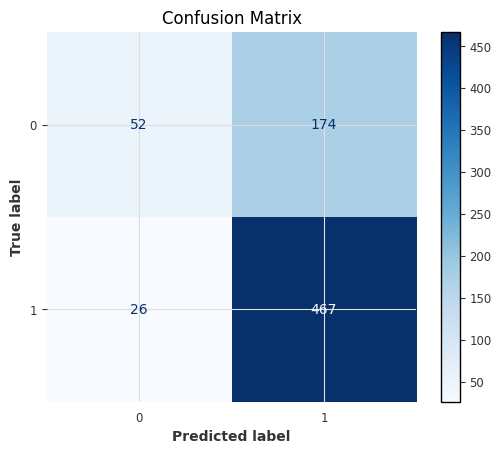

Precision: 0.7285
Recall (Sensitivity): 0.9473
Specificity: 0.2301
F1-Score: 0.8236
AUC-ROC: 0.5887


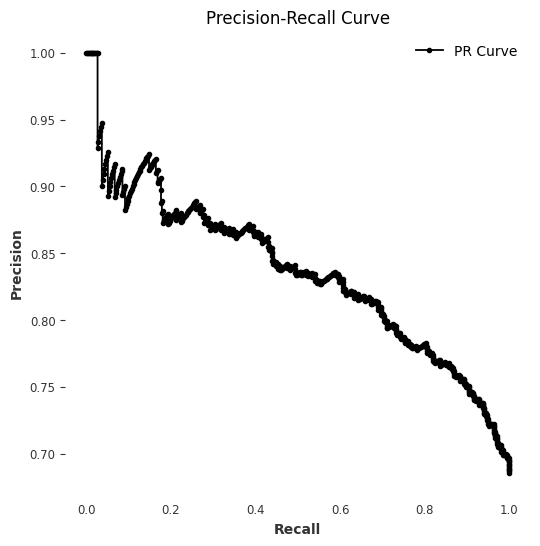

Fold 25 metrics: {'accuracy': tensor(0.7218), 'precision': 0.7285491419656787, 'recall': 0.947261663286004, 'f1': 0.8236331569664903, 'roc_auc': 0.5886750794306127, 'specificity': 0.23008849557522124}


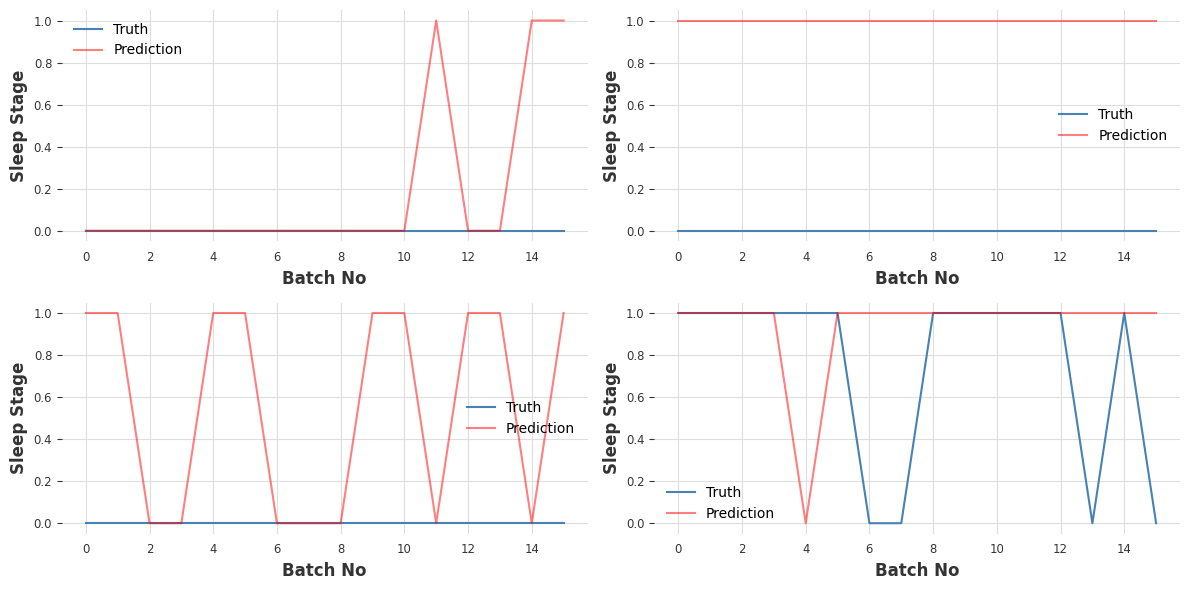

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.8286, Std: 0.0795
Precision - Mean: 0.8717, Std: 0.0972
Recall - Mean: 0.9182, Std: 0.0693
F1 - Mean: 0.8888, Std: 0.0566
Roc_auc - Mean: 0.7416, Std: 0.0974
Specificity - Mean: 0.5650, Std: 0.2139


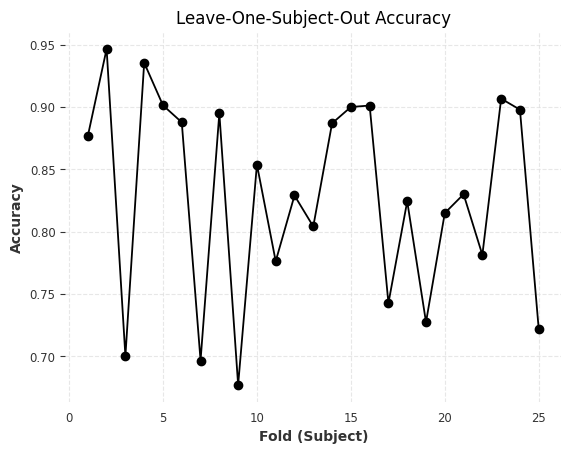

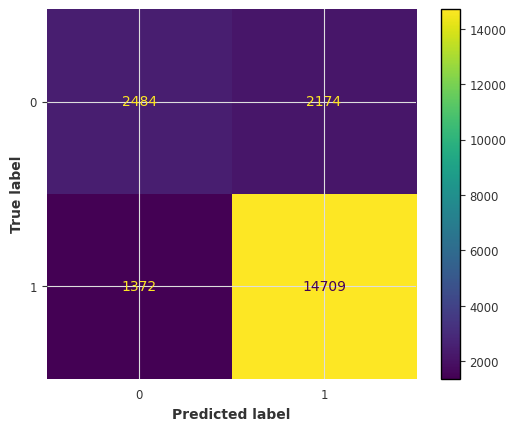

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import savgol_filter
# (Assume that load_metrics, plotter, train_loop, and test_loop are already imported)


#############################
# Dataset: Creating Sequences of Epochs
#############################

class SleepSequenceDataset(Dataset):
    """
    This dataset creates overlapping sequences of epochs.
    Each sample is a sequence of consecutive epochs (e.g., previous, current, next),
    with the middle epoch’s label used as the target.
    
    Parameters:
        epochs: a tensor of shape (num_epochs, n_channels, epoch_samples)
        labels: a tensor of shape (num_epochs, 1)  (or (num_epochs,) works as well)
        seq_length: number of epochs per sequence (should be odd so that a central epoch exists)
    """
    def __init__(self, epochs, labels, seq_length=3):
        self.epochs = epochs
        self.labels = labels
        self.seq_length = seq_length
        self.half_seq = seq_length // 2
        # We can only form sequences when we have enough epochs on each side.
        self.num_sequences = len(epochs) - 2 * self.half_seq

    def __len__(self):
        return self.num_sequences

    def __getitem__(self, idx):
        # Get a sequence of epochs starting at idx, ending at idx+seq_length
        sequence = self.epochs[idx : idx + self.seq_length]  # shape: (seq_length, n_channels, epoch_samples)
        # Use the middle epoch’s label as the target
        target = self.labels[idx + self.half_seq]
        return sequence, target

#############################
# Model Definition
#############################

class TimeDistributedCNN(nn.Module):
    """
    Applies a CNN to each epoch in the sequence.
    """
    def __init__(self, n_channels, cnn_out_features):
        super(TimeDistributedCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # output shape will be (batch, 64, 1)
        )
        # A fully connected layer to get a feature vector of size cnn_out_features
        self.fc = nn.Linear(64, cnn_out_features)

    def forward(self, x):
        # x shape: (batch_size, seq_length, n_channels, epoch_samples)
        batch_size, seq_length, C, T = x.size()
        # Combine batch and sequence dimensions
        x = x.view(batch_size * seq_length, C, T)
        features = self.cnn(x)        # shape: (batch_size*seq_length, 64, 1)
        features = features.squeeze(-1)  # shape: (batch_size*seq_length, 64)
        features = self.fc(features)     # shape: (batch_size*seq_length, cnn_out_features)
        # Restore the sequence dimension: (batch_size, seq_length, cnn_out_features)
        features = features.view(batch_size, seq_length, -1)
        return features

class SleepCNNLSTM_CrossEpoch(nn.Module):
    """
    Model that processes a sequence of epochs. Each epoch is first processed via a CNN 
    (applied time-distributed) to obtain a feature vector, and then an LSTM captures the temporal dependencies.
    The classifier then makes a prediction based on the LSTM output corresponding to the middle epoch.
    """
    def __init__(self, n_channels, epoch_samples, cnn_out_features, lstm_hidden, lstm_layers):
        super(SleepCNNLSTM_CrossEpoch, self).__init__()
        self.td_cnn = TimeDistributedCNN(n_channels=n_channels, cnn_out_features=cnn_out_features)
        self.lstm = nn.LSTM(input_size=cnn_out_features, hidden_size=lstm_hidden,
                            num_layers=lstm_layers, batch_first=True)
        self.classifier = nn.Linear(lstm_hidden, 1)  # For binary classification

    def forward(self, x):
        # x shape: (batch_size, seq_length, n_channels, epoch_samples)
        cnn_features = self.td_cnn(x)            # shape: (batch_size, seq_length, cnn_out_features)
        lstm_out, _ = self.lstm(cnn_features)      # shape: (batch_size, seq_length, lstm_hidden)
        mid_idx = x.size(1) // 2                   # index of the middle epoch
        target_features = lstm_out[:, mid_idx, :]  # shape: (batch_size, lstm_hidden)
        out = self.classifier(target_features)     # shape: (batch_size, 1)
        return out

#############################
# Hyperparameters & Device Setup
#############################

seq_length = 3            # Use 3 epochs per sequence (previous, current, next)
n_channels = 2            # 2 signals
epoch_samples = 240       # 30 sec epoch sampled at 8 Hz (8*30=240 samples)
cnn_out_features = 64     # Feature vector dimension from CNN
lstm_hidden = 128
lstm_layers = 3
batch_size = 16
num_epochs = 10           # Adjust as needed
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#############################
# Cross-Validation Loop (Leave-One-Subject-Out)
#############################

fold_results = []
fold = []
criterion = nn.BCEWithLogitsLoss()
results = []

for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: use all subjects except the current one for training
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels from the training subjects
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]


    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_features, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32)
    processed_X_test_tensor = torch.tensor(test_features, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

    # # Create sequence datasets (each sample is now a sequence of epochs)
    # train_dataset = SleepSequenceDataset(processed_X_train_tensor, processed_y_train_tensor, seq_length=seq_length)
    # test_dataset = SleepSequenceDataset(processed_X_test_tensor, processed_y_test_tensor, seq_length=seq_length)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for this fold
    model = SleepCNNLSTM_CrossEpoch(n_channels=n_channels, 
                                    epoch_samples=epoch_samples, 
                                    cnn_out_features=cnn_out_features, 
                                    lstm_hidden=lstm_hidden, 
                                    lstm_layers=lstm_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_loop(num_epochs=num_epochs, 
               train_loader=train_loader, 
               model=model, 
               criterion=criterion, 
               optimizer=optimizer, 
               device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, 
                             model=model, 
                             criterion=criterion, 
                             device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [result[0] for result in test_results]
    y_prob = [result[1] for result in test_results]

    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }
    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
        plotter(test_results)

print("Cross-validation complete!")

#############################
# Final Metrics & Plots
#############################

final_metrics = {metric: {"mean": np.mean([fmetrics[metric] for fmetrics in fold_results]),
                          "std": np.std([fmetrics[metric] for fmetrics in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fmetrics["accuracy"] for fmetrics in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Combined Confusion Matrix from all folds
y_true_all = np.concatenate([f["y_true"] for f in fold])
y_pred_all = np.concatenate([f["y_pred"] for f in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()

## Cross Epochs CNN biLSTM on Raw data with TSFEL feature extraction

In [ ]:
%pip install tsfel 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
def train_loop(model, num_epochs, criterion, optimizer, train_loader, device):
    train_results = []
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for sequences, tsfel_features, labels in train_loader:
            sequences = sequences.to(device)
            tsfel_features = tsfel_features.to(device)
            labels = labels.to(device).reshape(-1, 1)

            optimizer.zero_grad()
            outputs = model(sequences, tsfel_features)  # Pass both inputs to the model
            loss = criterion(outputs, labels)
            train_results.append((labels, outputs))

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}", end='\r')

        avg_loss = total_loss / len(train_loader)
        print(f"\nTraining Loss for Epoch {epoch+1}: {avg_loss:.4f}")
    return train_results

def test_loop(model, criterion, test_loader, device):
    test_results = []
    model.eval()
    correct = 0
    total = 0
    total_loss = 0
    with torch.no_grad():
        for sequences, tsfel_features, labels in test_loader:
            sequences = sequences.to(device)
            tsfel_features = tsfel_features.to(device)
            labels = labels.to(device).reshape(-1, 1)

            outputs = model(sequences, tsfel_features)  # Pass both inputs to the model
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = torch.sigmoid(outputs)
            predicted_labels = (preds > 0.5).float()
            test_results.append((labels, preds))

            correct += (predicted_labels == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total
    avg_loss = total_loss / len(test_loader)
    print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {avg_loss:.4f}")
    return test_results


In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    classification_report, precision_recall_curve, f1_score, 
    precision_score, recall_score, roc_auc_score
)
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt

def load_metrics(test_results, fold_index):
    # Extract y_true and y_prob lists from test_results.
    y_true_list = [item[0] for item in test_results]
    y_prob_list = [item[1] for item in test_results]

    # Concatenate the list of tensors into one tensor.
    y_prob_tensor = torch.cat([
        torch.tensor(prob, dtype=torch.float32) if not isinstance(prob, torch.Tensor) else prob 
        for prob in y_prob_list
    ])
    
    # Use y_prob_tensor directly to get predicted labels.
    y_pred = (y_prob_tensor.cpu().detach() > 0.5).float()
    
    # Concatenate ground truth tensors.
    y_true_tensor = torch.cat(y_true_list)
    
    # Convert tensors to numpy arrays for metric computations.
    y_true_np = y_true_tensor.cpu().detach().numpy()
    y_prob_np = y_prob_tensor.cpu().detach().numpy()
    y_pred_np = y_pred.cpu().detach().numpy()
    
    # Compute the confusion matrix.
    cm = confusion_matrix(y_true_np, y_pred_np)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0,0,0,0)
    
    print("tn:", tn)
    print("fp:", fp)
    print("fn:", fn)
    print("tp:", tp)
    print("Confusion Matrix:\n", cm)
    
    if fold_index in [0, 1, 15, 24]:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()
    
    # Compute additional metrics.
    precision_val = precision_score(y_true_np, y_pred_np, zero_division=0)
    recall_val = recall_score(y_true_np, y_pred_np, zero_division=0)
    specificity_val = tn / (tn + fp) if (tn + fp) > 0 else 0.0  
    f1_val = f1_score(y_true_np, y_pred_np, zero_division=0)
    try:
        auc_val = roc_auc_score(y_true_np, y_prob_np)
    except ValueError:
        auc_val = 0.0
    
    print(f"Precision: {precision_val:.4f}")
    print(f"Recall (Sensitivity): {recall_val:.4f}")
    print(f"Specificity: {specificity_val:.4f}")
    print(f"F1-Score: {f1_val:.4f}")
    print(f"AUC-ROC: {auc_val:.4f}")
    
    if fold_index in [0, 1, 15, 24]:
        precision_vals, recall_vals, _ = precision_recall_curve(y_true_np, y_prob_np)
        plt.figure(figsize=(6, 6))
        plt.plot(recall_vals, precision_vals, marker='.', label='PR Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.grid()
        plt.show()
    
    correct_predictions = (y_true_np == y_pred_np).sum()
    total_predictions = len(y_true_np)
    accuracy = correct_predictions / total_predictions

    return accuracy, precision_val, recall_val, specificity_val, f1_val, auc_val, y_true_np, y_prob_np


Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
Epoch 1/10, Loss: 0.0861
Training Loss for Epoch 1: 0.4850
Epoch 2/10, Loss: 0.1845
Training Loss for Epoch 2: 0.4154
Epoch 3/10, Loss: 0.5801
Training Loss for Epoch 3: 0.3747
Epoch 4/10, Loss: 0.4246
Training Loss for Epoch 4: 0.3542
Epoch 5/10, Loss: 0.5042
Training Loss for Epoch 5: 0.3421
Epoch 6/10, Loss: 0.5719
Training Loss for Epoch 6: 0.3299
Epoch 7/10, Loss: 0.3988
Training Loss for Epoch 7: 0.3190
Epoch 8/10, Loss: 0.2240
Training Loss for Epoch 8: 0.3151
Epoch 9/10, Loss: 0.3106
Training Loss for Epoch 9: 0.3062
Epoch 10/10, Loss: 0.3768
Training Loss for Epoch 10: 0.3000
Test Accuracy: 0.8954, Test Loss: 0.2346
tn: 63
fp: 56
fn: 22
tp: 605
Confusion Matrix:
 [[ 63  56]
 [ 22 605]]


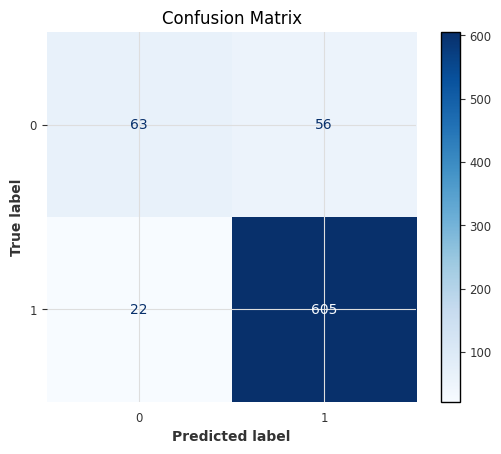

Precision: 0.9153
Recall (Sensitivity): 0.9649
Specificity: 0.5294
F1-Score: 0.9394
AUC-ROC: 0.9378


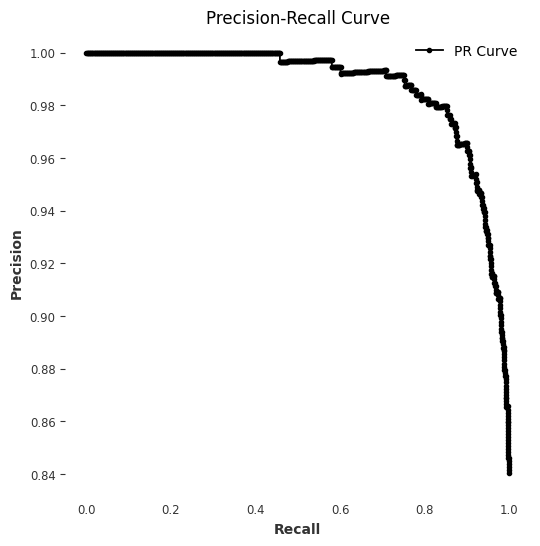

Fold 1 metrics: {'accuracy': 0.8954423592493298, 'precision': 0.9152798789712556, 'recall': 0.9649122807017544, 'f1': 0.9394409937888198, 'roc_auc': 0.9377588355916529, 'specificity': 0.5294117647058824}


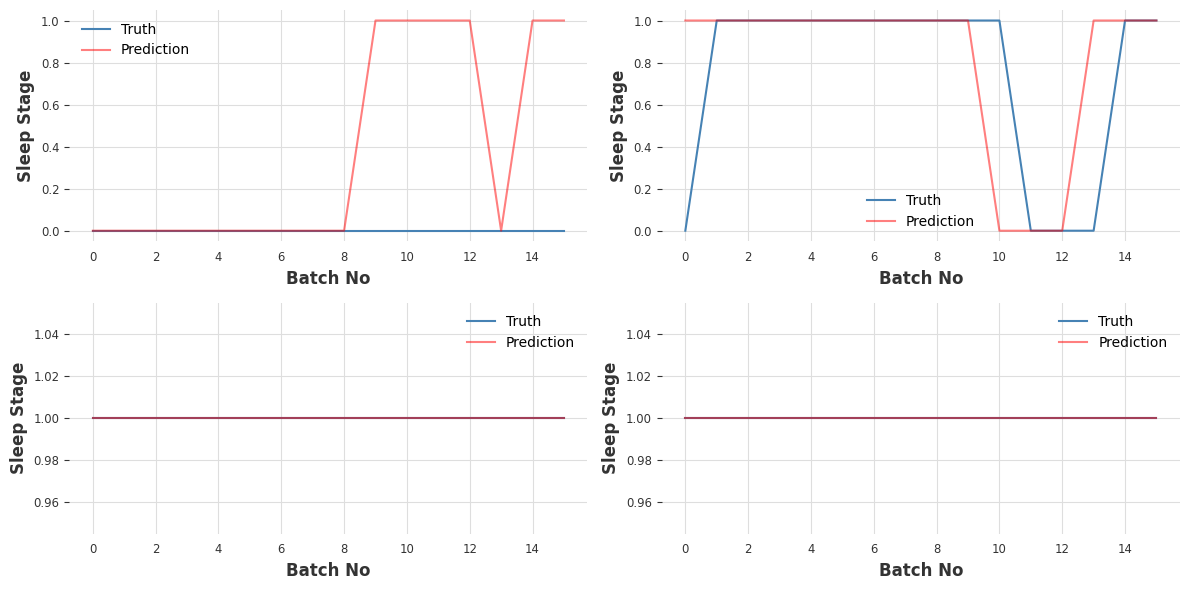

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
Epoch 1/10, Loss: 1.6058
Training Loss for Epoch 1: 0.4943
Epoch 2/10, Loss: 0.0158
Training Loss for Epoch 2: 0.4026
Epoch 3/10, Loss: 0.6261
Training Loss for Epoch 3: 0.3727
Epoch 4/10, Loss: 0.1433
Training Loss for Epoch 4: 0.3539
Epoch 5/10, Loss: 0.0474
Training Loss for Epoch 5: 0.3437
Epoch 6/10, Loss: 0.7534
Training Loss for Epoch 6: 0.3388
Epoch 7/10, Loss: 0.1986
Training Loss for Epoch 7: 0.3323
Epoch 8/10, Loss: 0.0134
Training Loss for Epoch 8: 0.3269
Epoch 9/10, Loss: 0.0121
Training Loss for Epoch 9: 0.3185
Epoch 10/10, Loss: 0.3863
Training Loss for Epoch 10: 0.3145
Test Accuracy: 0.9443, Test Loss: 0.1555
tn: 143
fp: 23
fn: 26
tp: 688
Confusion Matrix:
 [[143  23]
 [ 26 688]]


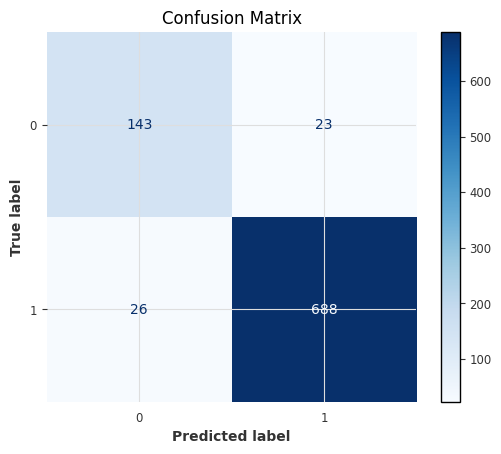

Precision: 0.9677
Recall (Sensitivity): 0.9636
Specificity: 0.8614
F1-Score: 0.9656
AUC-ROC: 0.9778


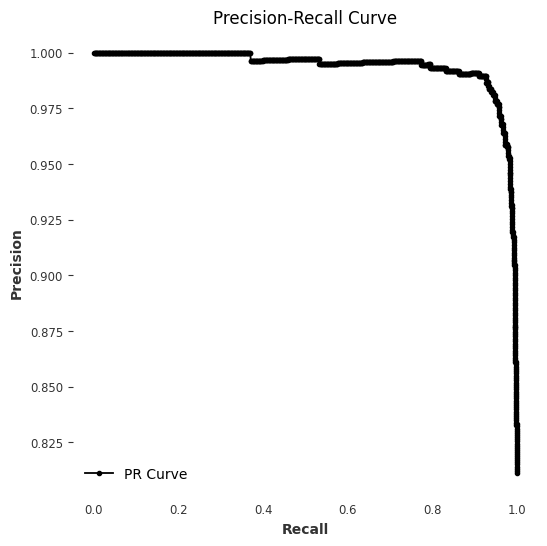

Fold 2 metrics: {'accuracy': 0.9443181818181818, 'precision': 0.9676511954992968, 'recall': 0.9635854341736695, 'f1': 0.9656140350877193, 'roc_auc': 0.9778483682629677, 'specificity': 0.8614457831325302}


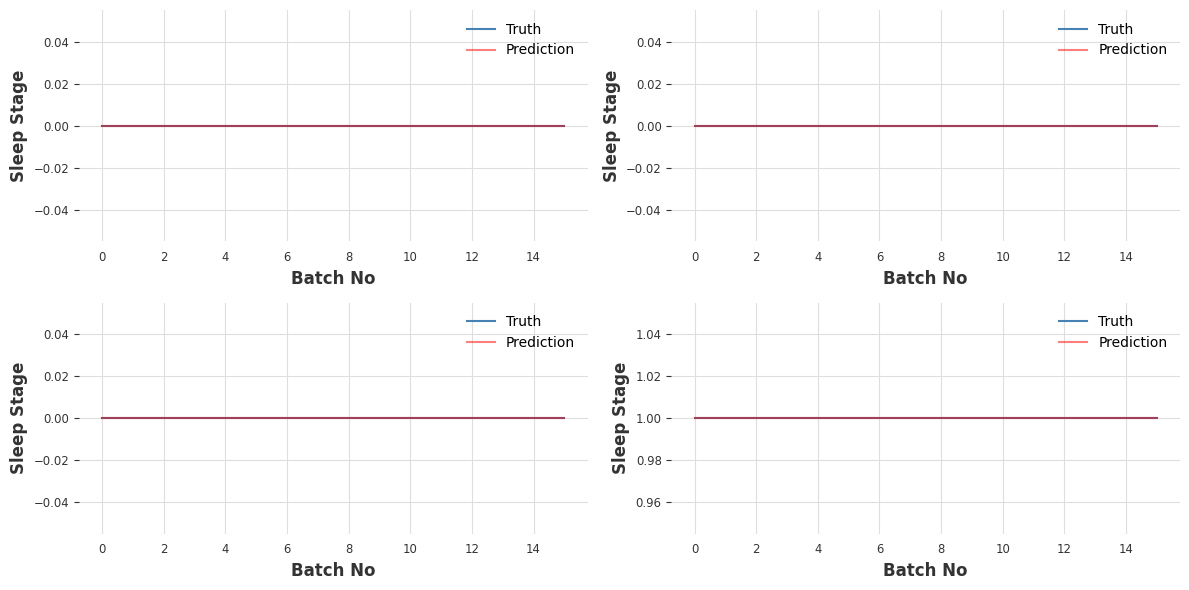

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
Epoch 1/10, Loss: 0.3304
Training Loss for Epoch 1: 0.4743
Epoch 2/10, Loss: 0.4583
Training Loss for Epoch 2: 0.3794
Epoch 3/10, Loss: 0.4937
Training Loss for Epoch 3: 0.3486
Epoch 4/10, Loss: 0.7397
Training Loss for Epoch 4: 0.3351
Epoch 5/10, Loss: 0.3112
Training Loss for Epoch 5: 0.3263
Epoch 6/10, Loss: 0.0968
Training Loss for Epoch 6: 0.3177
Epoch 7/10, Loss: 0.1260
Training Loss for Epoch 7: 0.3098
Epoch 8/10, Loss: 0.3493
Training Loss for Epoch 8: 0.3057
Epoch 9/10, Loss: 0.2118
Training Loss for Epoch 9: 0.2990
Epoch 10/10, Loss: 0.1796
Training Loss for Epoch 10: 0.2929
Test Accuracy: 0.7124, Test Loss: 0.8380
tn: 88
fp: 219
fn: 18
tp: 499
Confusion Matrix:
 [[ 88 219]
 [ 18 499]]
Precision: 0.6950
Recall (Sensitivity): 0.9652
Specificity: 0.2866
F1-Score: 0.8081
AUC-ROC: 0.6249
Fold 3 metrics: {'accuracy': 0.712378640776699, 'precision': 0.6949860724233984, 'recall': 0.965183752417795, 'f1': 0.808

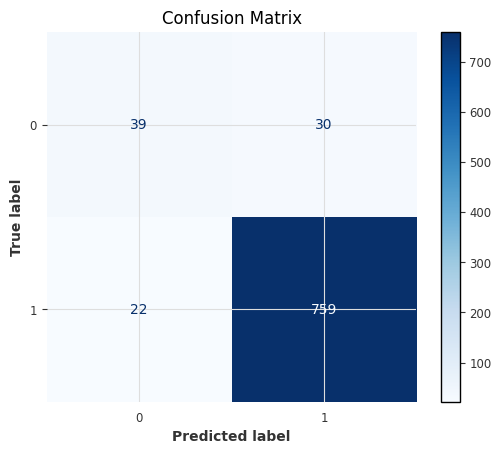

Precision: 0.9620
Recall (Sensitivity): 0.9718
Specificity: 0.5652
F1-Score: 0.9669
AUC-ROC: 0.9290


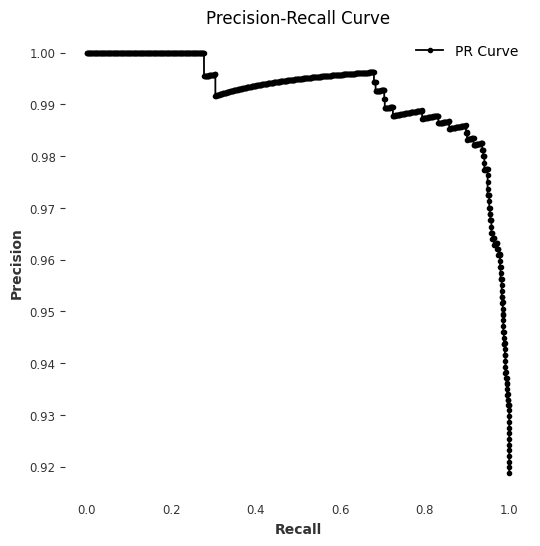

Fold 16 metrics: {'accuracy': 0.9388235294117647, 'precision': 0.9619771863117871, 'recall': 0.971830985915493, 'f1': 0.9668789808917198, 'roc_auc': 0.92896509491733, 'specificity': 0.5652173913043478}


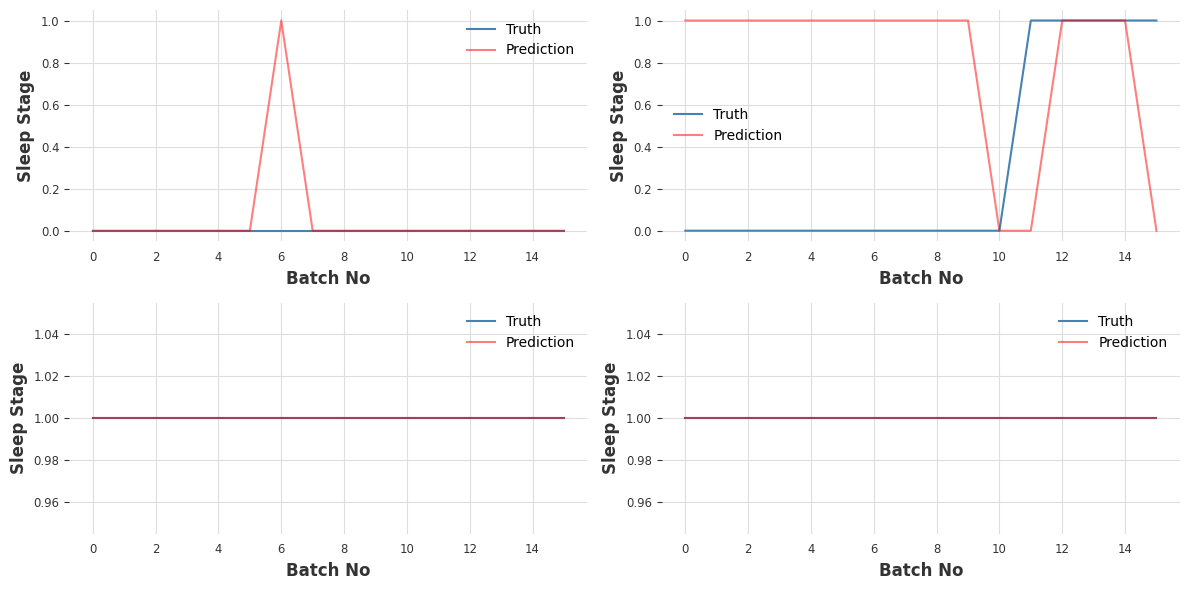

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
Epoch 1/10, Loss: 0.1764
Training Loss for Epoch 1: 0.4919
Epoch 2/10, Loss: 0.4717
Training Loss for Epoch 2: 0.4090
Epoch 3/10, Loss: 0.3672
Training Loss for Epoch 3: 0.3641
Epoch 4/10, Loss: 0.0521
Training Loss for Epoch 4: 0.3430
Epoch 5/10, Loss: 0.3531
Training Loss for Epoch 5: 0.3341
Epoch 6/10, Loss: 0.5743
Training Loss for Epoch 6: 0.3233
Epoch 7/10, Loss: 0.0999
Training Loss for Epoch 7: 0.3170
Epoch 8/10, Loss: 0.3871
Training Loss for Epoch 8: 0.3110
Epoch 9/10, Loss: 0.3917
Training Loss for Epoch 9: 0.3093
Epoch 10/10, Loss: 0.0600
Training Loss for Epoch 10: 0.3008
Test Accuracy: 0.7827, Test Loss: 0.4703
tn: 110
fp: 57
fn: 106
tp: 477
Confusion Matrix:
 [[110  57]
 [106 477]]
Precision: 0.8933
Recall (Sensitivity): 0.8182
Specificity: 0.6587
F1-Score: 0.8541
AUC-ROC: 0.8303
Fold 17 metrics: {'accuracy': 0.7826666666666666, 'precision': 0.8932584269662921, 'recall': 0.8181818181818182, 'f1': 

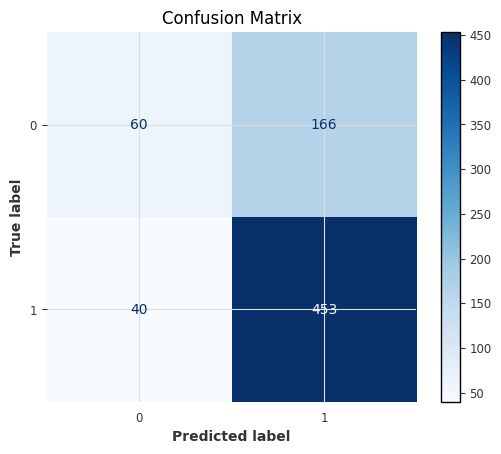

Precision: 0.7318
Recall (Sensitivity): 0.9189
Specificity: 0.2655
F1-Score: 0.8147
AUC-ROC: 0.7366


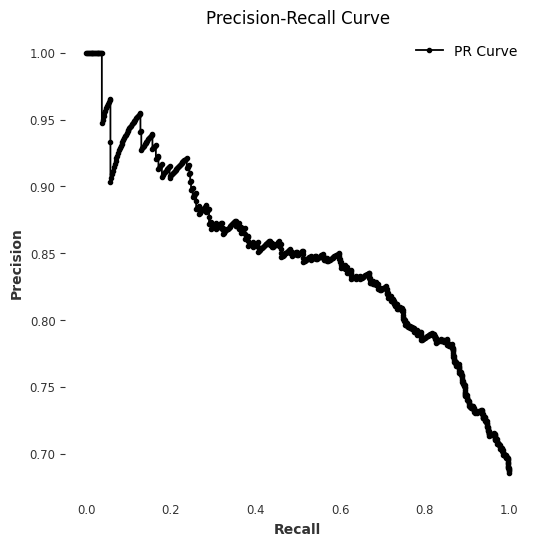

Fold 25 metrics: {'accuracy': 0.713490959666203, 'precision': 0.7318255250403877, 'recall': 0.9188640973630832, 'f1': 0.814748201438849, 'roc_auc': 0.7365865479545496, 'specificity': 0.26548672566371684}


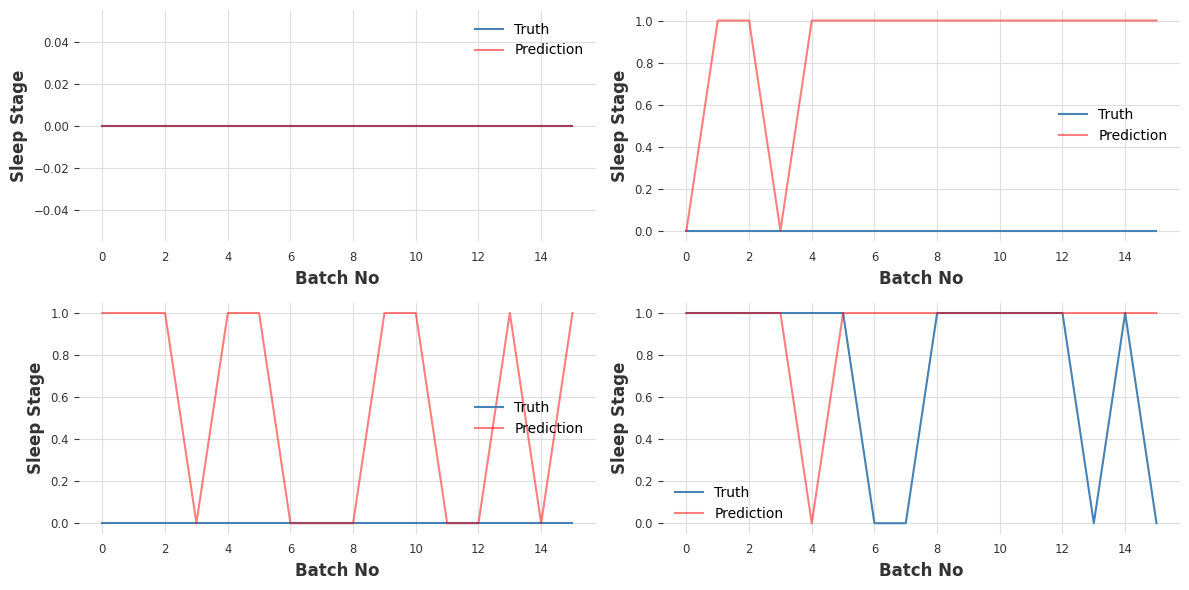

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.8192, Std: 0.0962
Precision - Mean: 0.8626, Std: 0.0978
Recall - Mean: 0.9166, Std: 0.1069
F1 - Mean: 0.8806, Std: 0.0730
Roc_auc - Mean: 0.8586, Std: 0.1016
Specificity - Mean: 0.5297, Std: 0.2048


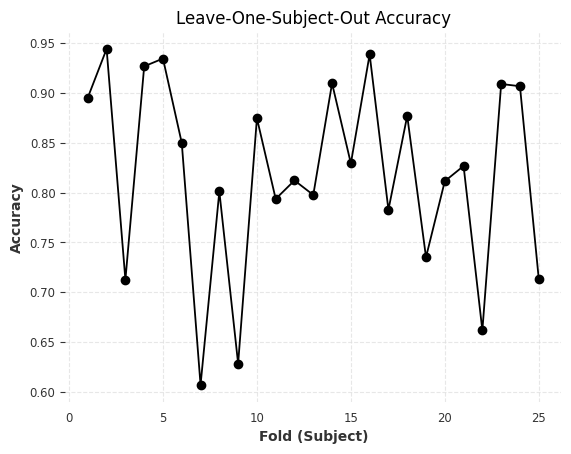

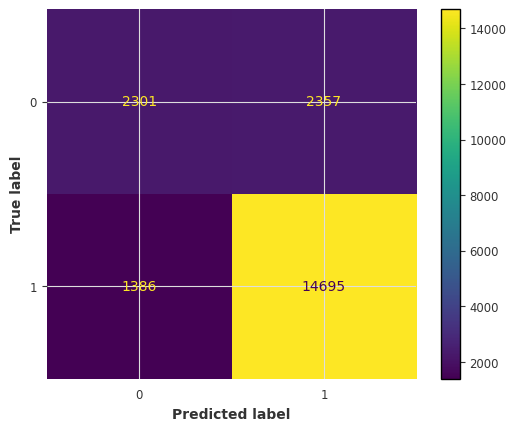

In [86]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import savgol_filter

# Assume that load_metrics, plotter, train_loop, and test_loop are already imported.
# Also assume that binary_subject_wise_data is available as a list of tuples,
# where each tuple is (features, labels) for a subject.
#   - features: numpy array of shape (num_epochs, n_channels, epoch_samples)
#   - labels: numpy array of shape (num_epochs, 1) (or (num_epochs,))

#############################################
# Helper: TSFEL Feature Extraction (On-the-Fly)
#############################################

def compute_tsfel_features(epoch):
    """
    A dummy TSFEL feature extractor.
    For each epoch (shape: [n_channels, epoch_samples]), this computes simple features:
    - Mean and standard deviation per channel.
    This returns a 1D numpy array of length 2*n_channels.
    """
    # epoch shape: (n_channels, epoch_samples)
    means = np.mean(epoch, axis=1)
    stds = np.std(epoch, axis=1)
    return np.concatenate([means, stds])  # Feature vector length = 2*n_channels

#############################################
# Dataset: Creating Sequences of Epochs with On-the-Fly TSFEL Features
#############################################

class SleepSequenceDataset(Dataset):
    """
    This dataset creates overlapping sequences of epochs.
    Each sample consists of a sequence of consecutive epochs along with TSFEL features,
    computed on the fly if not provided externally.
    The middle epoch’s label is used as the target.
    
    Parameters:
        epochs: a tensor of shape (num_epochs, n_channels, epoch_samples)
        labels: a tensor of shape (num_epochs, 1) or (num_epochs,)
        seq_length: number of epochs per sequence (should be odd so that a central epoch exists)
        tsfel_features: if provided, a tensor of shape (num_epochs, tsfel_feature_dim); if None,
                        TSFEL features are computed on the fly.
    """
    def __init__(self, epochs, labels, seq_length=3, tsfel_features=None):
        self.epochs = epochs
        self.labels = labels
        self.seq_length = seq_length
        self.half_seq = seq_length // 2
        self.num_sequences = len(epochs) - 2 * self.half_seq
        self.tsfel_features = tsfel_features  # Could be None

    def __len__(self):
        return self.num_sequences

    def __getitem__(self, idx):
        # Get a sequence of epochs
        sequence = self.epochs[idx : idx + self.seq_length]  # (seq_length, n_channels, epoch_samples)
        target = self.labels[idx + self.half_seq]
        
        # Use provided TSFEL features if available; otherwise, compute on the fly.
        if self.tsfel_features is not None:
            tsfel_seq = self.tsfel_features[idx : idx + self.seq_length]  # (seq_length, tsfel_feature_dim)
        else:
            tsfel_seq = []
            # Compute features for each epoch in the sequence
            for epoch in sequence:
                # epoch shape: (n_channels, epoch_samples); convert to numpy if needed
                if isinstance(epoch, torch.Tensor):
                    epoch_np = epoch.cpu().numpy()
                else:
                    epoch_np = epoch
                features = compute_tsfel_features(epoch_np)
                tsfel_seq.append(features)
            tsfel_seq = np.array(tsfel_seq)  # (seq_length, tsfel_feature_dim)
        return sequence, tsfel_seq, target

#############################################
# Model Definition: Combining 1D CNN with TSFEL Features
#############################################

class TimeDistributedCNN_TSFEL(nn.Module):
    """
    Processes each epoch using a CNN for the raw signal and a fully-connected network for TSFEL features.
    The outputs are concatenated to form a combined feature vector per epoch.
    """
    def __init__(self, n_channels, cnn_out_features, tsfel_feature_dim, tsfel_fc_features):
        super(TimeDistributedCNN_TSFEL, self).__init__()
        # CNN branch for raw epoch signals
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # output shape: (batch, 64, 1)
        )
        self.cnn_fc = nn.Linear(64, cnn_out_features)
        
        # Fully connected branch for TSFEL features
        self.tsfel_fc = nn.Sequential(
            nn.Linear(tsfel_feature_dim, tsfel_fc_features),
            nn.ReLU()
        )
        
        # Combined output dimension from both branches
        self.combined_feature_dim = cnn_out_features + tsfel_fc_features

    def forward(self, x, tsfel_features):
        # x: (batch_size, seq_length, n_channels, epoch_samples)
        # tsfel_features: (batch_size, seq_length, tsfel_feature_dim)
        batch_size, seq_length, C, T = x.size()
        
        # Process raw epochs with CNN:
        x = x.view(batch_size * seq_length, C, T)
        cnn_out = self.cnn(x)               # shape: (batch_size*seq_length, 64, 1)
        cnn_out = cnn_out.squeeze(-1)        # shape: (batch_size*seq_length, 64)
        cnn_features = self.cnn_fc(cnn_out)   # shape: (batch_size*seq_length, cnn_out_features)
        cnn_features = cnn_features.view(batch_size, seq_length, -1)
        
        # Process TSFEL features:
        tsfel_features = self.tsfel_fc(tsfel_features)  # shape: (batch_size, seq_length, tsfel_fc_features)
        
        # Concatenate CNN and TSFEL features:
        combined_features = torch.cat((cnn_features, tsfel_features), dim=-1)  # (batch_size, seq_length, combined_feature_dim)
        return combined_features

class SleepCNNLSTM_CrossEpoch_TSFEL(nn.Module):
    """
    Processes a sequence of epochs by combining CNN-extracted features and TSFEL features.
    An LSTM captures temporal dependencies, and the classifier predicts based on the representation
    of the middle epoch.
    """
    def __init__(self, n_channels, epoch_samples, cnn_out_features, 
                 tsfel_feature_dim, tsfel_fc_features, lstm_hidden, lstm_layers):
        super(SleepCNNLSTM_CrossEpoch_TSFEL, self).__init__()
        self.td_cnn_tsfel = TimeDistributedCNN_TSFEL(n_channels, cnn_out_features, tsfel_feature_dim, tsfel_fc_features)
        self.lstm = nn.LSTM(input_size=self.td_cnn_tsfel.combined_feature_dim, hidden_size=lstm_hidden,
                            num_layers=lstm_layers, batch_first=True)
        self.classifier = nn.Linear(lstm_hidden, 1)  # Binary classification

    def forward(self, x, tsfel_features):
        # x: (batch_size, seq_length, n_channels, epoch_samples)
        # tsfel_features: (batch_size, seq_length, tsfel_feature_dim)
        combined_features = self.td_cnn_tsfel(x, tsfel_features)
        lstm_out, _ = self.lstm(combined_features)
        mid_idx = x.size(1) // 2  # Use the middle epoch's representation
        target_features = lstm_out[:, mid_idx, :]  # (batch_size, lstm_hidden)
        out = self.classifier(target_features)
        return out

#############################################
# Hyperparameters & Device Setup
#############################################

seq_length = 3            # Number of epochs per sequence (previous, current, next)
n_channels = 2            # Number of channels in the raw data
epoch_samples = 240       # e.g., 30 sec epoch at 8 Hz -> 240 samples
cnn_out_features = 64     # Dimension of CNN feature vector
# For our dummy TSFEL extractor (mean and std per channel), tsfel_feature_dim = 2*n_channels = 4
tsfel_feature_dim = 4     
tsfel_fc_features = 32    # Dimension after processing TSFEL features with a FC layer
lstm_hidden = 128
lstm_layers = 3
batch_size = 16
num_epochs = 10           # Adjust as needed
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#############################################
# Cross-Validation Loop (Leave-One-Subject-Out)
#############################################

fold_results = []
fold_predictions = []
results = []

criterion = nn.BCEWithLogitsLoss()

for i, subject_data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # For each subject_data, assume the tuple is (features, labels)
    # Use all subjects except the current one for training:
    train_data = [data for j, data in enumerate(binary_subject_wise_data) if j != i]
    test_data = subject_data  # The current subject for testing

    # Concatenate features and labels from training subjects
    train_features = np.vstack([d[0] for d in train_data])
    train_labels = np.vstack([d[1] for d in train_data])
    
    test_features = test_data[0]
    test_labels = test_data[1]

    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_features, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32)
    
    processed_X_test_tensor = torch.tensor(test_features, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

    # Create sequence datasets.
    # Since TSFEL features are not precomputed, we pass tsfel_features=None.
    train_dataset = SleepSequenceDataset(processed_X_train_tensor, processed_y_train_tensor, seq_length=seq_length, tsfel_features=None)
    test_dataset = SleepSequenceDataset(processed_X_test_tensor, processed_y_test_tensor, seq_length=seq_length, tsfel_features=None)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for this fold
    model = SleepCNNLSTM_CrossEpoch_TSFEL(n_channels=n_channels, 
                                          epoch_samples=epoch_samples, 
                                          cnn_out_features=cnn_out_features, 
                                          tsfel_feature_dim=tsfel_feature_dim,
                                          tsfel_fc_features=tsfel_fc_features,
                                          lstm_hidden=lstm_hidden, 
                                          lstm_layers=lstm_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model (train_loop is assumed to be defined/imported)
    train_loop(num_epochs=num_epochs, 
               train_loader=train_loader, 
               model=model, 
               criterion=criterion, 
               optimizer=optimizer, 
               device=device)

    # Evaluate on the test subject (test_loop is assumed to be defined/imported)
    test_results = test_loop(test_loader=test_loader, 
                             model=model, 
                             criterion=criterion, 
                             device=device)
    results.append((i, test_results))

    # Process metrics and predictions for each fold
    y_true = [result[0] for result in test_results]
    y_prob = [result[1] for result in test_results]

    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }
    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (np.array(y_prob) > 0.5).astype(int)
    }
    fold_predictions.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    # Optionally plot results for select folds
    if i in [0, 1, 15, 24]:
        plotter(test_results)

print("Cross-validation complete!")

#############################################
# Final Metrics & Plots
#############################################

final_metrics = {metric: {"mean": np.mean([fmetrics[metric] for fmetrics in fold_results]),
                          "std": np.std([fmetrics[metric] for fmetrics in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fmetrics["accuracy"] for fmetrics in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Combined Confusion Matrix from all folds
y_true_all = np.concatenate([f["y_true"] for f in fold_predictions])
y_pred_all = np.concatenate([f["y_pred"] for f in fold_predictions])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [60]:
%pip install scipy==1.8.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python <3.12,>=3.8; 1.10.0rc1 Requires-Python <3.12,>=3.8; 1.10.0rc2 Requires-Python <3.12,>=3.8; 1.10.1 Requires-Python <3.12,>=3.8; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11; 1.9.0 Requires-Python >=3.8,<3.12; 1.9.0rc1 Requires-Python >=3.8,<3.12; 1.9.0rc2 Requires-Python >=3.8,<3.12; 1.9.0rc3 Requires-Python >=3.8,<3.12; 1.9.1 Requires-Python >=3.8,<3.12
ERROR: Could not find a version that satisfies the requirement scipy==1.8.1 (from versions: 

Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
Epoch 1/10, Loss: 0.4291
Training Loss for Epoch 1: 0.4881
Epoch 2/10, Loss: 0.0430
Training Loss for Epoch 2: 0.3968
Epoch 3/10, Loss: 0.0308
Training Loss for Epoch 3: 0.3609
Epoch 4/10, Loss: 0.2495
Training Loss for Epoch 4: 0.3519
Epoch 5/10, Loss: 0.6746
Training Loss for Epoch 5: 0.3412
Epoch 6/10, Loss: 0.4660
Training Loss for Epoch 6: 0.3325
Epoch 7/10, Loss: 0.7216
Training Loss for Epoch 7: 0.3232
Epoch 8/10, Loss: 0.5731
Training Loss for Epoch 8: 0.3177
Epoch 9/10, Loss: 0.1101
Training Loss for Epoch 9: 0.3078
Epoch 10/10, Loss: 0.4188
Training Loss for Epoch 10: 0.3027
Test Accuracy: 0.8686, Test Loss: 0.2597
tn: 73
fp: 46
fn: 52
tp: 575
Confusion Matrix:
 [[ 73  46]
 [ 52 575]]


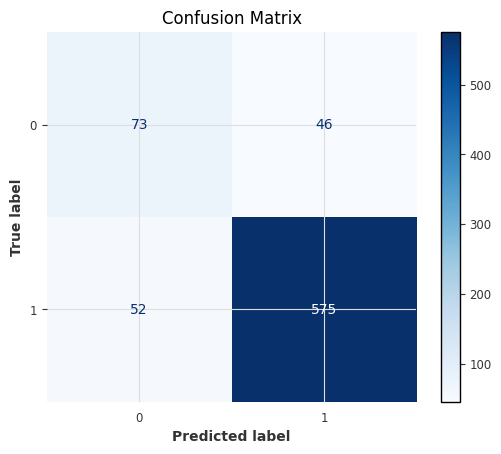

Precision: 0.9259
Recall (Sensitivity): 0.9171
Specificity: 0.6134
F1-Score: 0.9215
AUC-ROC: 0.9241


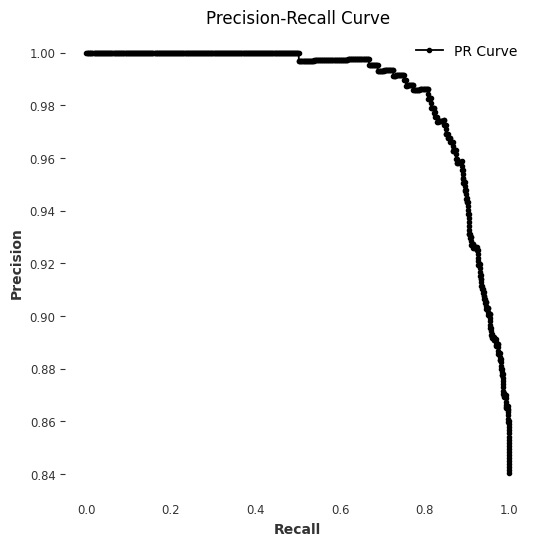

Fold 1 metrics: {'accuracy': 0.868632707774799, 'precision': 0.9259259259259259, 'recall': 0.9170653907496013, 'f1': 0.9214743589743589, 'roc_auc': 0.9241285030758715, 'specificity': 0.6134453781512605}


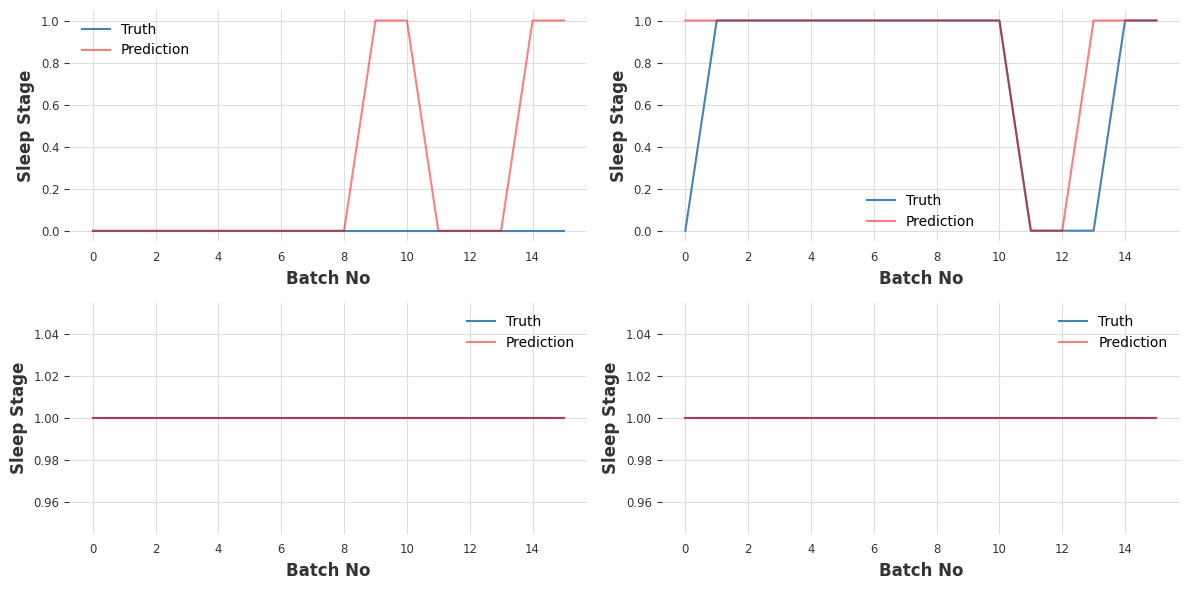

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
Epoch 1/10, Loss: 0.2727
Training Loss for Epoch 1: 0.4879
Epoch 2/10, Loss: 0.4132
Training Loss for Epoch 2: 0.4193
Epoch 3/10, Loss: 0.0512
Training Loss for Epoch 3: 0.3700
Epoch 4/10, Loss: 0.0418
Training Loss for Epoch 4: 0.3553
Epoch 5/10, Loss: 0.0416
Training Loss for Epoch 5: 0.3447
Epoch 6/10, Loss: 0.0106
Training Loss for Epoch 6: 0.3433
Epoch 7/10, Loss: 0.5261
Training Loss for Epoch 7: 0.3358
Epoch 8/10, Loss: 1.3315
Training Loss for Epoch 8: 0.3293
Epoch 9/10, Loss: 0.4820
Training Loss for Epoch 9: 0.3220
Epoch 10/10, Loss: 0.0038
Training Loss for Epoch 10: 0.3172
Test Accuracy: 0.9386, Test Loss: 0.1535
tn: 131
fp: 35
fn: 19
tp: 695
Confusion Matrix:
 [[131  35]
 [ 19 695]]


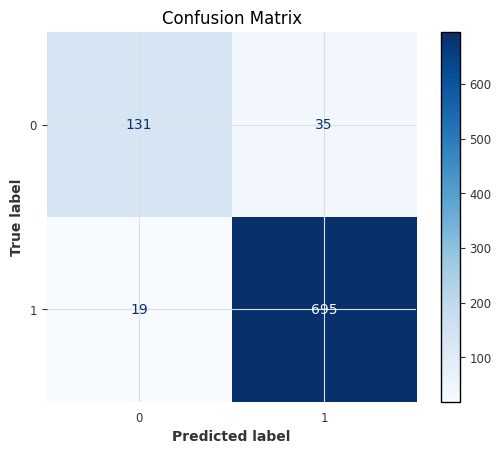

Precision: 0.9521
Recall (Sensitivity): 0.9734
Specificity: 0.7892
F1-Score: 0.9626
AUC-ROC: 0.9783


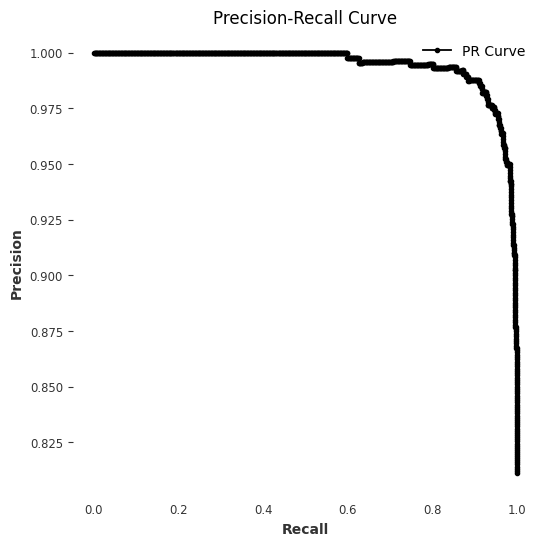

Fold 2 metrics: {'accuracy': 0.9386363636363636, 'precision': 0.952054794520548, 'recall': 0.9733893557422969, 'f1': 0.9626038781163435, 'roc_auc': 0.9783166278559616, 'specificity': 0.7891566265060241}


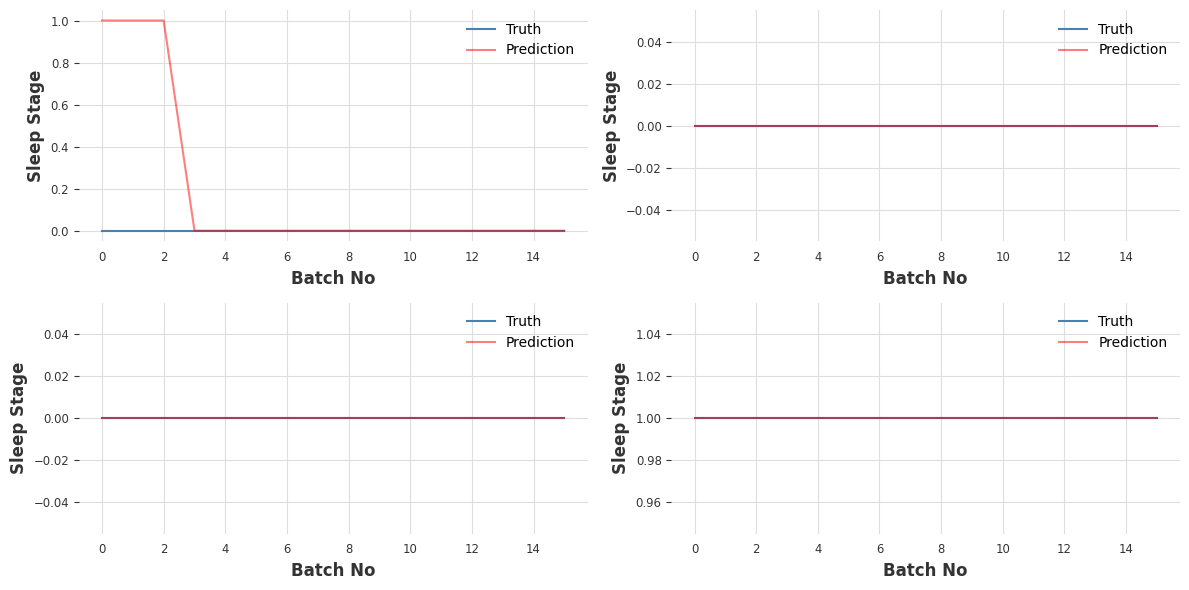

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
Epoch 1/10, Loss: 0.5761
Training Loss for Epoch 1: 0.4751
Epoch 2/10, Loss: 0.5437
Training Loss for Epoch 2: 0.3873
Epoch 3/10, Loss: 0.7281
Training Loss for Epoch 3: 0.3577
Epoch 4/10, Loss: 0.7953
Training Loss for Epoch 4: 0.3453
Epoch 5/10, Loss: 0.1673
Training Loss for Epoch 5: 0.3330
Epoch 6/10, Loss: 0.3268
Training Loss for Epoch 6: 0.3247
Epoch 7/10, Loss: 0.3171
Training Loss for Epoch 7: 0.3169
Epoch 8/10, Loss: 0.4592
Training Loss for Epoch 8: 0.3142
Epoch 9/10, Loss: 0.2427
Training Loss for Epoch 9: 0.3033
Epoch 10/10, Loss: 0.1896
Training Loss for Epoch 10: 0.3011
Test Accuracy: 0.6711, Test Loss: 0.8621
tn: 125
fp: 182
fn: 89
tp: 428
Confusion Matrix:
 [[125 182]
 [ 89 428]]
Precision: 0.7016
Recall (Sensitivity): 0.8279
Specificity: 0.4072
F1-Score: 0.7595
AUC-ROC: 0.6252
Fold 3 metrics: {'accuracy': 0.6711165048543689, 'precision': 0.7016393442622951, 'recall': 0.8278529980657641, 'f1': 0.

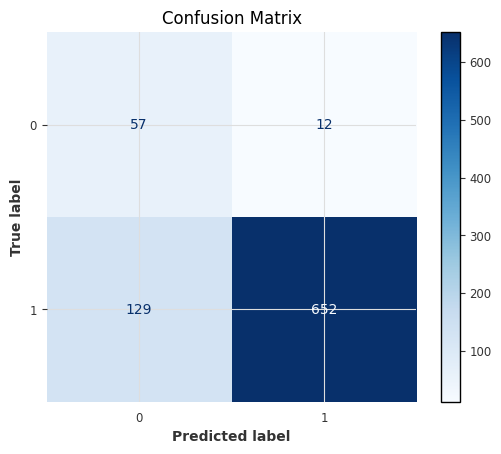

Precision: 0.9819
Recall (Sensitivity): 0.8348
Specificity: 0.8261
F1-Score: 0.9024
AUC-ROC: 0.8897


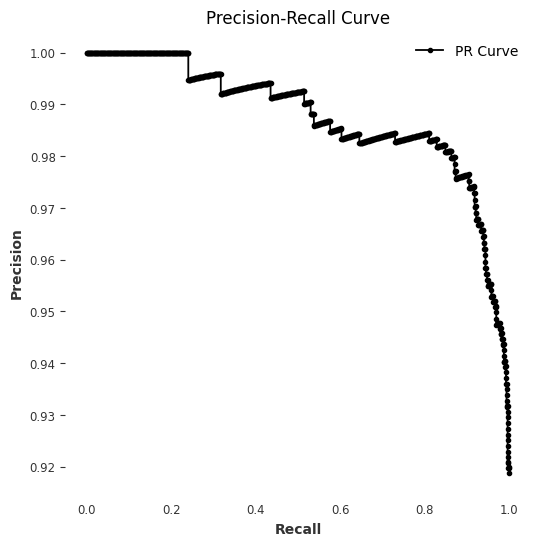

Fold 16 metrics: {'accuracy': 0.8341176470588235, 'precision': 0.9819277108433735, 'recall': 0.8348271446862996, 'f1': 0.9024221453287197, 'roc_auc': 0.8897177531592718, 'specificity': 0.8260869565217391}


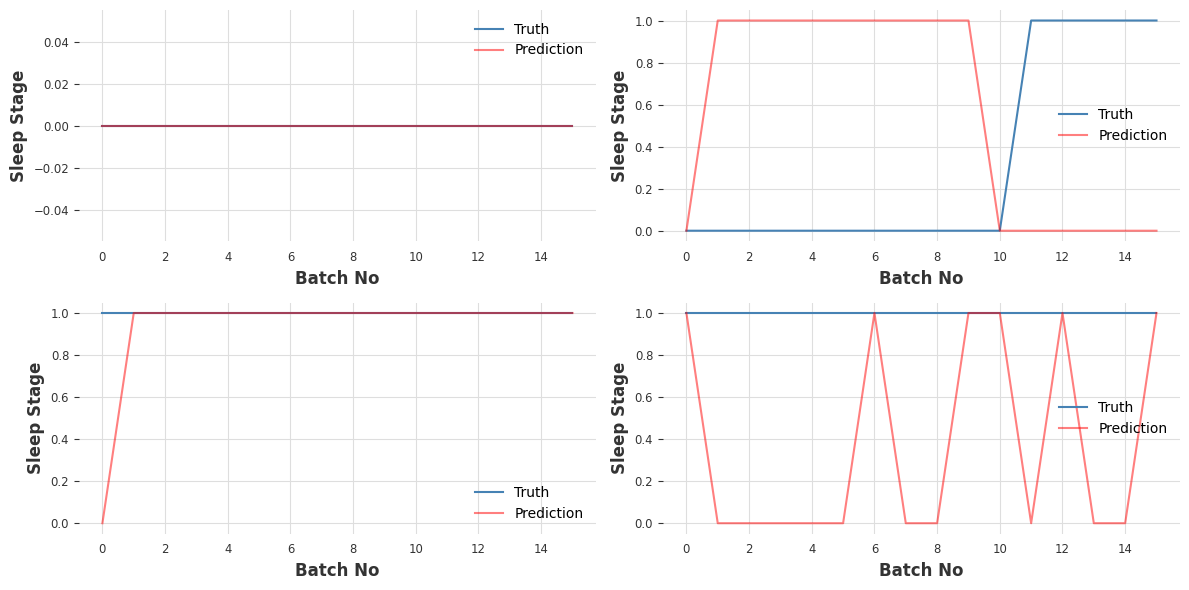

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
Epoch 1/10, Loss: 0.3309
Training Loss for Epoch 1: 0.4814
Epoch 2/10, Loss: 0.0492
Training Loss for Epoch 2: 0.3872
Epoch 3/10, Loss: 0.0632
Training Loss for Epoch 3: 0.3566
Epoch 4/10, Loss: 0.0200
Training Loss for Epoch 4: 0.3432
Epoch 5/10, Loss: 0.6096
Training Loss for Epoch 5: 0.3306
Epoch 6/10, Loss: 0.2427
Training Loss for Epoch 6: 0.3228
Epoch 7/10, Loss: 0.2438
Training Loss for Epoch 7: 0.3203
Epoch 8/10, Loss: 0.0040
Training Loss for Epoch 8: 0.3106
Epoch 9/10, Loss: 0.0577
Training Loss for Epoch 9: 0.3072
Epoch 10/10, Loss: 0.0864
Training Loss for Epoch 10: 0.2996
Test Accuracy: 0.7427, Test Loss: 0.4794
tn: 106
fp: 61
fn: 132
tp: 451
Confusion Matrix:
 [[106  61]
 [132 451]]
Precision: 0.8809
Recall (Sensitivity): 0.7736
Specificity: 0.6347
F1-Score: 0.8237
AUC-ROC: 0.8320
Fold 17 metrics: {'accuracy': 0.7426666666666667, 'precision': 0.880859375, 'recall': 0.7735849056603774, 'f1': 0.82374

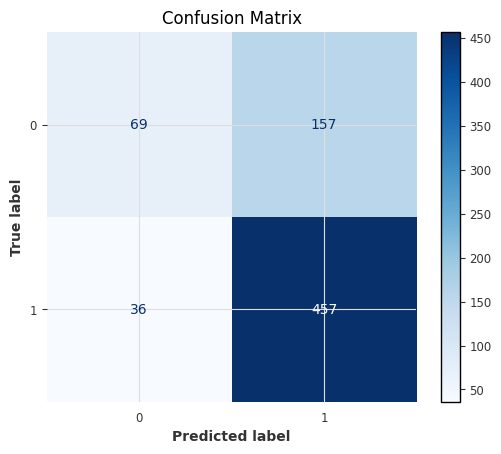

Precision: 0.7443
Recall (Sensitivity): 0.9270
Specificity: 0.3053
F1-Score: 0.8257
AUC-ROC: 0.7399


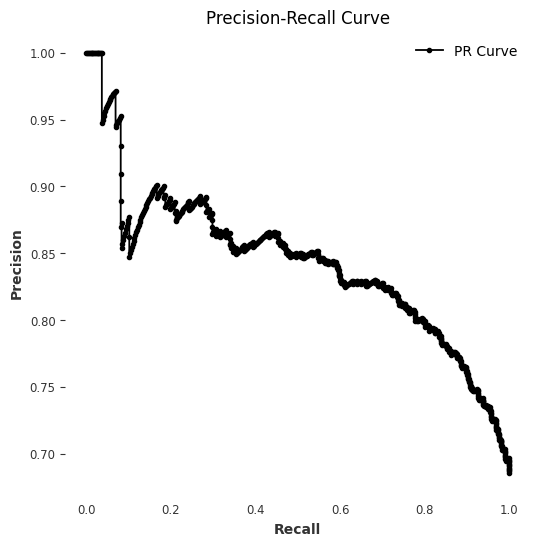

Fold 25 metrics: {'accuracy': 0.7315716272600834, 'precision': 0.744299674267101, 'recall': 0.9269776876267748, 'f1': 0.8256549232158988, 'roc_auc': 0.7398984006174945, 'specificity': 0.3053097345132743}


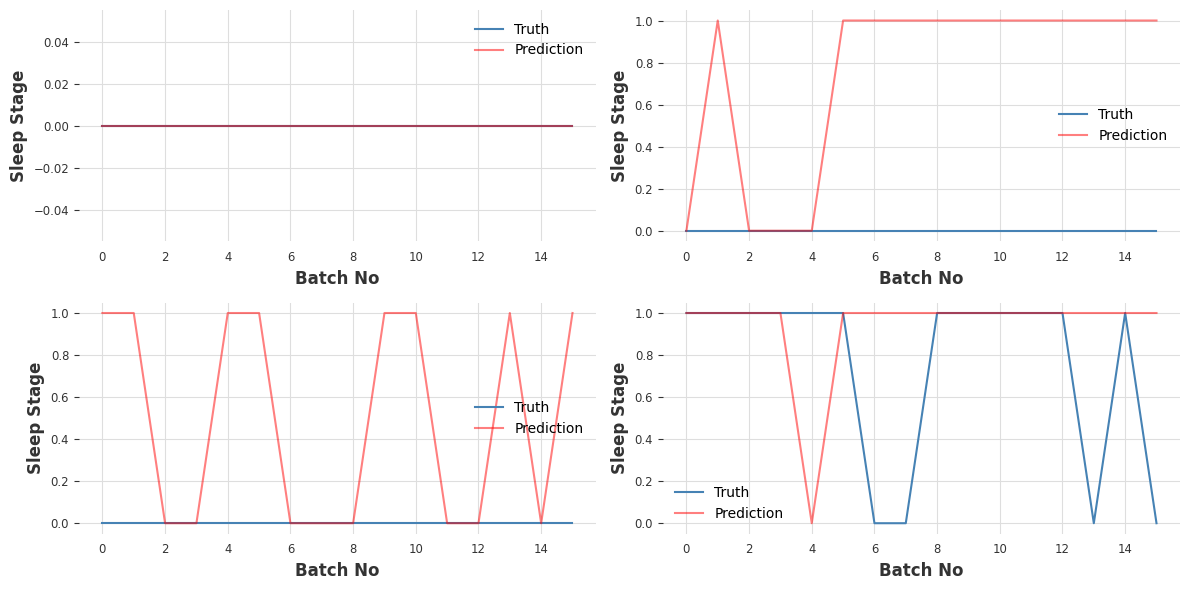

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.8115, Std: 0.0822
Precision - Mean: 0.8606, Std: 0.1036
Recall - Mean: 0.9115, Std: 0.0758
F1 - Mean: 0.8786, Std: 0.0580
Roc_auc - Mean: 0.8510, Std: 0.1201
Specificity - Mean: 0.5386, Std: 0.2150


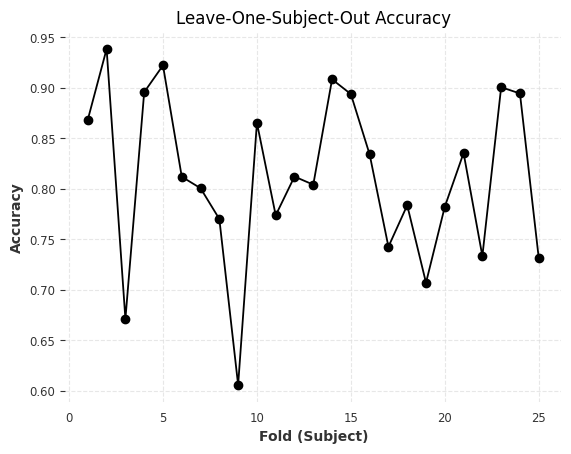

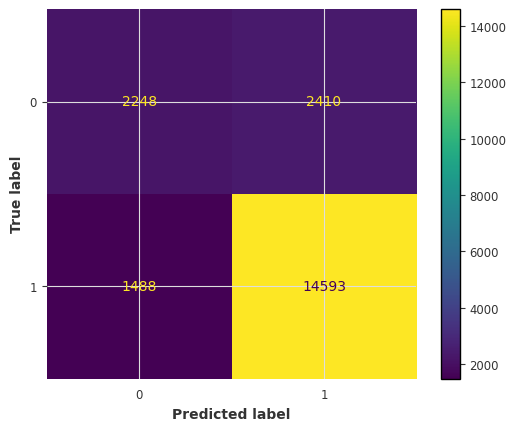

In [87]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import savgol_filter

# Assume that load_metrics, plotter, train_loop, and test_loop are already imported.
# Also assume that binary_subject_wise_data is available as a list of tuples,
# where each tuple is (features, labels) for a subject.
#   - features: numpy array of shape (num_epochs, n_channels, epoch_samples)
#   - labels: numpy array of shape (num_epochs, 1) (or (num_epochs,))

#############################################
# Helper: TSFEL Feature Extraction (On-the-Fly)
#############################################

def compute_tsfel_features(epoch):
    """
    A dummy TSFEL feature extractor.
    For each epoch (shape: [n_channels, epoch_samples]), this computes simple features:
    - Mean and standard deviation per channel.
    This returns a 1D numpy array of length 2*n_channels.
    """
    # epoch shape: (n_channels, epoch_samples)
    means = np.mean(epoch, axis=1)
    stds = np.std(epoch, axis=1)
    return np.concatenate([means, stds])  # Feature vector length = 2*n_channels

#############################################
# Dataset: Creating Sequences of Epochs with On-the-Fly TSFEL Features
#############################################

class SleepSequenceDataset(Dataset):
    """
    This dataset creates overlapping sequences of epochs.
    Each sample consists of a sequence of consecutive epochs along with TSFEL features,
    computed on the fly if not provided externally.
    The middle epoch’s label is used as the target.
    
    Parameters:
        epochs: a tensor of shape (num_epochs, n_channels, epoch_samples)
        labels: a tensor of shape (num_epochs, 1) or (num_epochs,)
        seq_length: number of epochs per sequence (should be odd so that a central epoch exists)
        tsfel_features: if provided, a tensor of shape (num_epochs, tsfel_feature_dim); if None,
                        TSFEL features are computed on the fly.
    """
    def __init__(self, epochs, labels, seq_length=3, tsfel_features=None):
        self.epochs = epochs
        self.labels = labels
        self.seq_length = seq_length
        self.half_seq = seq_length // 2
        self.num_sequences = len(epochs) - 2 * self.half_seq
        self.tsfel_features = tsfel_features  # Could be None

    def __len__(self):
        return self.num_sequences

    def __getitem__(self, idx):
        # Get a sequence of epochs
        sequence = self.epochs[idx : idx + self.seq_length]  # (seq_length, n_channels, epoch_samples)
        target = self.labels[idx + self.half_seq]
        
        # Use provided TSFEL features if available; otherwise, compute on the fly.
        if self.tsfel_features is not None:
            tsfel_seq = self.tsfel_features[idx : idx + self.seq_length]  # (seq_length, tsfel_feature_dim)
        else:
            tsfel_seq = []
            # Compute features for each epoch in the sequence
            for epoch in sequence:
                # epoch shape: (n_channels, epoch_samples); convert to numpy if needed
                if isinstance(epoch, torch.Tensor):
                    epoch_np = epoch.cpu().numpy()
                else:
                    epoch_np = epoch
                features = compute_tsfel_features(epoch_np)
                tsfel_seq.append(features)
            tsfel_seq = np.array(tsfel_seq)  # (seq_length, tsfel_feature_dim)
        return sequence, tsfel_seq, target

#############################################
# Model Definition: Combining 1D CNN with TSFEL Features
#############################################

class TimeDistributedCNN_TSFEL(nn.Module):
    """
    Processes each epoch using a CNN for the raw signal and a fully-connected network for TSFEL features.
    The outputs are concatenated to form a combined feature vector per epoch.
    """
    def __init__(self, n_channels, cnn_out_features, tsfel_feature_dim, tsfel_fc_features):
        super(TimeDistributedCNN_TSFEL, self).__init__()
        # CNN branch for raw epoch signals
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # output shape: (batch, 64, 1)
        )
        self.cnn_fc = nn.Linear(64, cnn_out_features)
        
        # Fully connected branch for TSFEL features
        self.tsfel_fc = nn.Sequential(
            nn.Linear(tsfel_feature_dim, tsfel_fc_features),
            nn.ReLU()
        )
        
        # Combined output dimension from both branches
        self.combined_feature_dim = cnn_out_features + tsfel_fc_features

    def forward(self, x, tsfel_features):
        # x: (batch_size, seq_length, n_channels, epoch_samples)
        # tsfel_features: (batch_size, seq_length, tsfel_feature_dim)
        batch_size, seq_length, C, T = x.size()
        
        # Process raw epochs with CNN:
        x = x.view(batch_size * seq_length, C, T)
        cnn_out = self.cnn(x)               # shape: (batch_size*seq_length, 64, 1)
        cnn_out = cnn_out.squeeze(-1)        # shape: (batch_size*seq_length, 64)
        cnn_features = self.cnn_fc(cnn_out)   # shape: (batch_size*seq_length, cnn_out_features)
        cnn_features = cnn_features.view(batch_size, seq_length, -1)
        
        # Process TSFEL features:
        tsfel_features = self.tsfel_fc(tsfel_features)  # shape: (batch_size, seq_length, tsfel_fc_features)
        
        # Concatenate CNN and TSFEL features:
        combined_features = torch.cat((cnn_features, tsfel_features), dim=-1)  # (batch_size, seq_length, combined_feature_dim)
        return combined_features

# class SleepCNNLSTM_CrossEpoch_TSFEL(nn.Module):
#     """
#     Processes a sequence of epochs by combining CNN-extracted features and TSFEL features.
#     An LSTM captures temporal dependencies, and the classifier predicts based on the representation
#     of the middle epoch.
#     """
#     def __init__(self, n_channels, epoch_samples, cnn_out_features, 
#                  tsfel_feature_dim, tsfel_fc_features, lstm_hidden, lstm_layers):
#         super(SleepCNNLSTM_CrossEpoch_TSFEL, self).__init__()
#         self.td_cnn_tsfel = TimeDistributedCNN_TSFEL(n_channels, cnn_out_features, tsfel_feature_dim, tsfel_fc_features)
#         self.lstm = nn.LSTM(input_size=self.td_cnn_tsfel.combined_feature_dim, hidden_size=lstm_hidden,
#                             num_layers=lstm_layers, batch_first=True)
#         self.classifier = nn.Linear(lstm_hidden, 1)  # Binary classification

#     def forward(self, x, tsfel_features):
#         # x: (batch_size, seq_length, n_channels, epoch_samples)
#         # tsfel_features: (batch_size, seq_length, tsfel_feature_dim)
#         combined_features = self.td_cnn_tsfel(x, tsfel_features)
#         lstm_out, _ = self.lstm(combined_features)
#         mid_idx = x.size(1) // 2  # Use the middle epoch's representation
#         target_features = lstm_out[:, mid_idx, :]  # (batch_size, lstm_hidden)
#         out = self.classifier(target_features)
#         return out
    
class SleepCNNLSTM_Prev2_TSFEL(nn.Module):
        """
        Processes a sequence of epochs by combining CNN-extracted features and TSFEL features.
        Instead of using the entire sequence in the LSTM, this model uses only the previous two epochs
        to compute a context vector. This context is then concatenated with the current (target) epoch's features,
        and the combined vector is fed into the classifier.
        
        Assumes a sequence length of 3:
        - Indices 0 and 1: previous epochs.
        - Index 2: current epoch (target).
        """
        def __init__(self, n_channels, epoch_samples, cnn_out_features, 
                    tsfel_feature_dim, tsfel_fc_features, lstm_hidden, lstm_layers):
            super(SleepCNNLSTM_Prev2_TSFEL, self).__init__()
            # Combined feature extractor for each epoch.
            self.td_cnn_tsfel = TimeDistributedCNN_TSFEL(n_channels, cnn_out_features, tsfel_feature_dim, tsfel_fc_features)
            # LSTM to process only the previous 2 epochs.
            self.lstm = nn.LSTM(input_size=self.td_cnn_tsfel.combined_feature_dim, 
                                hidden_size=lstm_hidden,
                                num_layers=lstm_layers, 
                                batch_first=True)
            # Classifier now takes the concatenated vector of:
            #   - context vector from previous 2 epochs (lstm_hidden)
            #   - current epoch features (td_cnn_tsfel.combined_feature_dim)
            self.classifier = nn.Linear(self.td_cnn_tsfel.combined_feature_dim + lstm_hidden, 1)

        def forward(self, x, tsfel_features):
            # x: (batch_size, seq_length, n_channels, epoch_samples)
            # tsfel_features: (batch_size, seq_length, tsfel_feature_dim)
            combined_features = self.td_cnn_tsfel(x, tsfel_features)
            # combined_features: (batch_size, seq_length, combined_feature_dim)
            # Assume seq_length == 3:
            #   - Previous epochs: indices 0 and 1
            #   - Current epoch (target): index 2
            
            # Process the previous 2 epochs with LSTM to obtain context.
            prev_seq = combined_features[:, :2, :]  # shape: (batch_size, 2, combined_feature_dim)
            lstm_out, _ = self.lstm(prev_seq)         # shape: (batch_size, 2, lstm_hidden)
            # Use the last output from the LSTM (corresponding to the second previous epoch)
            context_vector = lstm_out[:, -1, :]       # shape: (batch_size, lstm_hidden)
            
            # Extract the current (target) epoch features.
            current_features = combined_features[:, 2, :]  # shape: (batch_size, combined_feature_dim)
            
            # Concatenate context and current features.
            combined_target = torch.cat((current_features, context_vector), dim=-1)  # shape: (batch_size, combined_feature_dim + lstm_hidden)
            
            # Classify based on the concatenated features.
            out = self.classifier(combined_target)  # shape: (batch_size, 1)
            return out


#############################################
# Hyperparameters & Device Setup
#############################################

seq_length = 3            # Number of epochs per sequence (previous, current, next)
n_channels = 2            # Number of channels in the raw data
epoch_samples = 240       # e.g., 30 sec epoch at 8 Hz -> 240 samples
cnn_out_features = 64     # Dimension of CNN feature vector
# For our dummy TSFEL extractor (mean and std per channel), tsfel_feature_dim = 2*n_channels = 4
tsfel_feature_dim = 4     
tsfel_fc_features = 32    # Dimension after processing TSFEL features with a FC layer
lstm_hidden = 128
lstm_layers = 3
batch_size = 16
num_epochs = 10           # Adjust as needed
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#############################################
# Cross-Validation Loop (Leave-One-Subject-Out)
#############################################

fold_results = []
fold_predictions = []
results = []

criterion = nn.BCEWithLogitsLoss()

for i, subject_data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # For each subject_data, assume the tuple is (features, labels)
    # Use all subjects except the current one for training:
    train_data = [data for j, data in enumerate(binary_subject_wise_data) if j != i]
    test_data = subject_data  # The current subject for testing

    # Concatenate features and labels from training subjects
    train_features = np.vstack([d[0] for d in train_data])
    train_labels = np.vstack([d[1] for d in train_data])
    
    test_features = test_data[0]
    test_labels = test_data[1]

    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_features, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32)
    
    processed_X_test_tensor = torch.tensor(test_features, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

    # Create sequence datasets.
    # Since TSFEL features are not precomputed, we pass tsfel_features=None.
    train_dataset = SleepSequenceDataset(processed_X_train_tensor, processed_y_train_tensor, seq_length=seq_length, tsfel_features=None)
    test_dataset = SleepSequenceDataset(processed_X_test_tensor, processed_y_test_tensor, seq_length=seq_length, tsfel_features=None)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for this fold
    model = SleepCNNLSTM_CrossEpoch_TSFEL(n_channels=n_channels, 
                                          epoch_samples=epoch_samples, 
                                          cnn_out_features=cnn_out_features, 
                                          tsfel_feature_dim=tsfel_feature_dim,
                                          tsfel_fc_features=tsfel_fc_features,
                                          lstm_hidden=lstm_hidden, 
                                          lstm_layers=lstm_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model (train_loop is assumed to be defined/imported)
    train_loop(num_epochs=num_epochs, 
               train_loader=train_loader, 
               model=model, 
               criterion=criterion, 
               optimizer=optimizer, 
               device=device)

    # Evaluate on the test subject (test_loop is assumed to be defined/imported)
    test_results = test_loop(test_loader=test_loader, 
                             model=model, 
                             criterion=criterion, 
                             device=device)
    results.append((i, test_results))

    # Process metrics and predictions for each fold
    y_true = [result[0] for result in test_results]
    y_prob = [result[1] for result in test_results]

    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }
    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (np.array(y_prob) > 0.5).astype(int)
    }
    fold_predictions.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    # Optionally plot results for select folds
    if i in [0, 1, 15, 24]:
        plotter(test_results)

print("Cross-validation complete!")

#############################################
# Final Metrics & Plots
#############################################

final_metrics = {metric: {"mean": np.mean([fmetrics[metric] for fmetrics in fold_results]),
                          "std": np.std([fmetrics[metric] for fmetrics in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fmetrics["accuracy"] for fmetrics in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Combined Confusion Matrix from all folds
y_true_all = np.concatenate([f["y_true"] for f in fold_predictions])
y_pred_all = np.concatenate([f["y_pred"] for f in fold_predictions])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [61]:
import scipy
print(scipy.__version__)


1.12.0


## Cross Epochs, CNN biLSTM model on processed data

In [33]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from scipy.signal import savgol_filter
# # (Assume that load_metrics, plotter, train_loop, and test_loop are already imported)

# #############################
# # Preprocessing Functions
# #############################

# def normalize_channels(data):
#     # Compute the mean and std along axis=(0,2) (channels and samples per epoch)
#     means = np.mean(data, axis=(0, 2))
#     stds = np.std(data, axis=(0, 2))
#     norm_data = (data - means[:, None]) / stds[:, None]
#     return norm_data

# def apply_sg_filter(data, window=25, order=5):
#     filtered = np.zeros_like(data)
#     for i in range(data.shape[0]):
#         for j in range(data.shape[1]):
#             filtered[i, j] = savgol_filter(data[i, j], window, order)
#     return filtered

# def restore_shape(data, original_shape):
#     return data.reshape(-1, original_shape[1], original_shape[2])

# #############################
# # Dataset: Creating Sequences of Epochs
# #############################

# class SleepSequenceDataset(Dataset):
#     """
#     This dataset creates overlapping sequences of epochs.
#     Each sample is a sequence of consecutive epochs (e.g., previous, current, next),
#     with the middle epoch’s label used as the target.
    
#     Parameters:
#         epochs: a tensor of shape (num_epochs, n_channels, epoch_samples)
#         labels: a tensor of shape (num_epochs, 1)  (or (num_epochs,) works as well)
#         seq_length: number of epochs per sequence (should be odd so that a central epoch exists)
#     """
#     def __init__(self, epochs, labels, seq_length=3):
#         self.epochs = epochs
#         self.labels = labels
#         self.seq_length = seq_length
#         self.half_seq = seq_length // 2
#         # We can only form sequences when we have enough epochs on each side.
#         self.num_sequences = len(epochs) - 2 * self.half_seq

#     def __len__(self):
#         return self.num_sequences

#     def __getitem__(self, idx):
#         # Get a sequence of epochs starting at idx, ending at idx+seq_length
#         sequence = self.epochs[idx : idx + self.seq_length]  # shape: (seq_length, n_channels, epoch_samples)
#         # Use the middle epoch’s label as the target
#         target = self.labels[idx + self.half_seq]
#         return sequence, target

# #############################
# # Model Definition
# #############################

# class TimeDistributedCNN(nn.Module):
#     """
#     Applies a CNN to each epoch in the sequence.
#     """
#     def __init__(self, n_channels, cnn_out_features):
#         super(TimeDistributedCNN, self).__init__()
#         self.cnn = nn.Sequential(
#             nn.Conv1d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool1d(2),
#             nn.Conv1d(32, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.AdaptiveAvgPool1d(1)  # output shape will be (batch, 64, 1)
#         )
#         # A fully connected layer to get a feature vector of size cnn_out_features
#         self.fc = nn.Linear(64, cnn_out_features)

#     def forward(self, x):
#         # x shape: (batch_size, seq_length, n_channels, epoch_samples)
#         batch_size, seq_length, C, T = x.size()
#         # Combine batch and sequence dimensions
#         x = x.view(batch_size * seq_length, C, T)
#         features = self.cnn(x)        # shape: (batch_size*seq_length, 64, 1)
#         features = features.squeeze(-1)  # shape: (batch_size*seq_length, 64)
#         features = self.fc(features)     # shape: (batch_size*seq_length, cnn_out_features)
#         # Restore the sequence dimension: (batch_size, seq_length, cnn_out_features)
#         features = features.view(batch_size, seq_length, -1)
#         return features

# class SleepCNNLSTM_CrossEpoch(nn.Module):
#     """
#     Model that processes a sequence of epochs. Each epoch is first processed via a CNN 
#     (applied time-distributed) to obtain a feature vector, and then an LSTM captures the temporal dependencies.
#     The classifier then makes a prediction based on the LSTM output corresponding to the middle epoch.
#     """
#     def __init__(self, n_channels, epoch_samples, cnn_out_features, lstm_hidden, lstm_layers):
#         super(SleepCNNLSTM_CrossEpoch, self).__init__()
#         self.td_cnn = TimeDistributedCNN(n_channels=n_channels, cnn_out_features=cnn_out_features)
#         self.lstm = nn.LSTM(input_size=cnn_out_features, hidden_size=lstm_hidden,
#                             num_layers=lstm_layers, batch_first=True)
#         self.classifier = nn.Linear(lstm_hidden, 1)  # For binary classification

#     def forward(self, x):
#         # x shape: (batch_size, seq_length, n_channels, epoch_samples)
#         cnn_features = self.td_cnn(x)            # shape: (batch_size, seq_length, cnn_out_features)
#         lstm_out, _ = self.lstm(cnn_features)      # shape: (batch_size, seq_length, lstm_hidden)
#         mid_idx = x.size(1) // 2                   # index of the middle epoch
#         target_features = lstm_out[:, mid_idx, :]  # shape: (batch_size, lstm_hidden)
#         out = self.classifier(target_features)     # shape: (batch_size, 1)
#         return out

# #############################
# # Hyperparameters & Device Setup
# #############################

# seq_length = 3            # Use 3 epochs per sequence (previous, current, next)
# n_channels = 2            # 2 signals
# epoch_samples = 240       # 30 sec epoch sampled at 8 Hz (8*30=240 samples)
# cnn_out_features = 64     # Feature vector dimension from CNN
# lstm_hidden = 128
# lstm_layers = 3
# batch_size = 16
# num_epochs = 10           # Adjust as needed
# learning_rate = 0.001
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# #############################
# # Cross-Validation Loop (Leave-One-Subject-Out)
# #############################

# fold_results = []
# fold = []
# criterion = nn.BCEWithLogitsLoss()
# results = []

# for i, data in enumerate(binary_subject_wise_data):
#     print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
#     # Split data: use all subjects except the current one for training
#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels from the training subjects
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     test_features = test_data[0]
#     test_labels = test_data[1]

#     # Preprocess the data
#     train_norm = normalize_channels(train_features)
#     train_sg = apply_sg_filter(train_norm)
#     test_norm = normalize_channels(test_features)
#     test_sg = apply_sg_filter(test_norm)

#     # Convert to PyTorch tensors
#     processed_X_train_tensor = torch.tensor(train_sg, dtype=torch.float32)
#     processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32)
#     processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
#     processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

#     # Create sequence datasets (each sample is now a sequence of epochs)
#     train_dataset = SleepSequenceDataset(processed_X_train_tensor, processed_y_train_tensor, seq_length=seq_length)
#     test_dataset = SleepSequenceDataset(processed_X_test_tensor, processed_y_test_tensor, seq_length=seq_length)
    
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # Reinitialize the model for this fold
#     model = SleepCNNLSTM_CrossEpoch(n_channels=n_channels, 
#                                     epoch_samples=epoch_samples, 
#                                     cnn_out_features=cnn_out_features, 
#                                     lstm_hidden=lstm_hidden, 
#                                     lstm_layers=lstm_layers).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Train the model
#     train_loop(num_epochs=num_epochs, 
#                train_loader=train_loader, 
#                model=model, 
#                criterion=criterion, 
#                optimizer=optimizer, 
#                device=device)

#     # Evaluate on the test subject
#     test_results = test_loop(test_loader=test_loader, 
#                              model=model, 
#                              criterion=criterion, 
#                              device=device)
#     results.append((i, test_results))

#     # Process metrics and plot results for each fold
#     y_true = [result[0] for result in test_results]
#     y_prob = [result[1] for result in test_results]

#     accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
#     fold_metrics = {
#         "accuracy": accuracy_score,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "roc_auc": auc,
#         "specificity": specificity,
#     }
#     fold_results.append(fold_metrics)

#     fold_pred = {
#         "y_true": y_true,
#         "y_pred": (y_prob > 0.5).astype(int)
#     }
#     fold.append(fold_pred)

#     print(f"Fold {i+1} metrics: {fold_metrics}")
    
#     if i in [0, 1, 15, 24]:
#         plotter(test_results)

# print("Cross-validation complete!")

# #############################
# # Final Metrics & Plots
# #############################

# final_metrics = {metric: {"mean": np.mean([fmetrics[metric] for fmetrics in fold_results]),
#                           "std": np.std([fmetrics[metric] for fmetrics in fold_results])}
#                  for metric in fold_results[0]}

# print("\nFinal Metrics:")
# for metric, values in final_metrics.items():
#     print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# # Plot accuracy for each fold
# accuracies = [fmetrics["accuracy"] for fmetrics in fold_results]
# plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
# plt.xlabel("Fold (Subject)")
# plt.ylabel("Accuracy")
# plt.title("Leave-One-Subject-Out Accuracy")
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Optional: Combined Confusion Matrix from all folds
# y_true_all = np.concatenate([f["y_true"] for f in fold])
# y_pred_all = np.concatenate([f["y_pred"] for f in fold])
# cm = confusion_matrix(y_true_all, y_pred_all)
# ConfusionMatrixDisplay(cm).plot()
# plt.show()


In [ ]:
torch.save(modelcnnlstm.state_dict(), "modelcnnlstmproccessed.pth")
print("Saved PyTorch Model State to modelcnnlstmproccessed.pth")

Saved PyTorch Model State to modelcnnlstmproccessed.pth


## Analysis
File 2 has 14 signals we are interested in the "flow" and "ribcage" signals only

samples in "flow" and "ribcage" signal **179760** sampling rate **8.0Hz**

no of edf blocks(sec)  **22470.0** is expected  (samples/sampling_rate) 

But No of values in sleep_stages file is **748**

Sleep stages Verify alignment: **22440** (30*748)

### We should probably truncate the last 30 sec

## Basically create a window of 240 values(from the signal), which predicts the sleep stages (1 value from the sleep_stages.txt)

dim = $$ \sum_{\substack{i=1 \\ \text{len}(\text{sleep\_stages}[i]) \text{ exists}}}^{n} \text{len}(\text{sleep\_stages}[i]) $$
X = (dim, 240)

Except the last (<=240values) in the signal of a subject take the 240 values as rows of a tensor